<h1> Projeto da Casa de IA - Competição do Titanic
    <p>

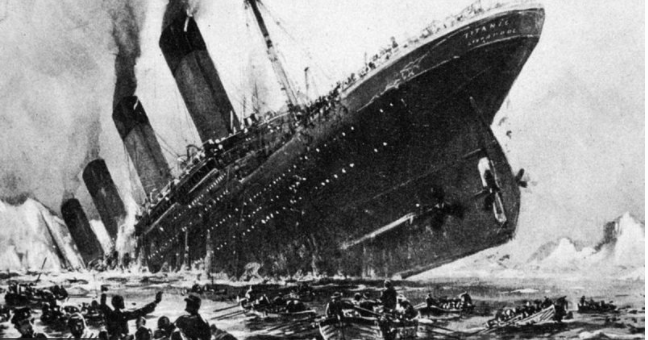

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [126]:
train_data=pd.read_csv('train.csv')#mudar o path para o que está em seu computador
test_data=pd.read_csv('test.csv')
#Dados_test["Age"]=Dados_test.Age.fillna(Dados.Age.mean())
#Dados_test["Fare"]=Dados_test.Age.fillna(Dados.Fare.mean())
#Dados_test.isnull().sum()
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [127]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p> Foram escolhidas os seguintes parâmetros para a construção dos modelos iniciais:
   <p> 'Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked'

<p>Separar o conjunto de dados em treino e validação para avaliarmos os modelos.<p>
<p>Treinar no conjunto de treinamento e avaliar no conjunto de validação usando 'accuracy'<p>

<ul><b>Ideias para melhorar nosso código:</b>
    <li>Organizar os diferentes modelos e acurácias em um DF para ser mais fácil compará-los</li>
    <li>Categorizar as idades</li>
    <li>Usar os pronomes de tratatamento </li>
    <li>Número de pessoas por família </li>
    <li>Adicionar a cabine </li>
    <li></li>
    </ul>
    
     http://www.balmoralsoftware.com/titanic/titanic.htmsite>

<h2><b>Feature Engeneering

In [129]:
full_dataset=[train_data,test_data]

In [130]:
for data in full_dataset:
    data['Pronouns']=data.Name.str.findall(r'[A-Z]+[a-z]*\.').str[0].str[:-1]

train_data['Pronouns'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Lady          1
Mme           1
Countess      1
Jonkheer      1
Sir           1
Ms            1
Capt          1
Name: Pronouns, dtype: int64

<ul><b>Pronouns:</b>
    <li> Mr : 0</li>
    <li> Miss : 1</li>
    <li> Mrs : 2</li>
    <li> Master : 3</li>
    <li> Others : 4</li>
</ul>

In [131]:
pronouns_list=['Mr','Miss','Mrs','Master','Others']
pronouns_map=dict(zip(pronouns_list,range(len(pronouns_list))))#{'Mr':0,'Miss':1,'Mrs':2,'Master':3}
for data in full_dataset:
    data.loc[False==data['Pronouns'].isin(pronouns_list),'Pronouns']='Others'
    #data['Pronouns']=data['Pronouns'].map(pronouns_map)

<h2><b>Sex:</b></h2>
<ul>
    <li> male : 0</li>
    <li> female : 1</li>
</ul>

map_sex={'male':0,'female':1}
for data in full_dataset:
    data['Sex']=data['Sex'].map(map_sex)

<p>preenche os dados faltantes das idades 

<h3><b>Age

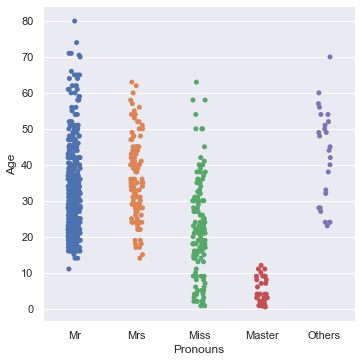

In [132]:
sns.catplot(x='Pronouns',y='Age',data=train_data)

Vemos que dependendo do pronome de tratamento utilizado as idades variam

In [133]:
train_data.groupby(['Sex','Pclass','Pronouns']).median()['Age']

Sex     Pclass  Pronouns
female  1       Miss        30.0
                Mrs         41.5
                Others      28.5
        2       Miss        24.0
                Mrs         32.0
                Others      28.0
        3       Miss        18.0
                Mrs         31.0
male    1       Master       4.0
                Mr          40.0
                Others      49.0
        2       Master       1.0
                Mr          31.0
                Others      46.5
        3       Master       4.0
                Mr          26.0
Name: Age, dtype: float64

In [134]:
train_data.groupby('Pronouns')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    44.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [135]:
for data in full_dataset:
    data['Age'].fillna(data.groupby(['Sex','Pclass','Pronouns'])['Age'].transform('median'),inplace=True)
    #train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

<h3><b>Embarked

In [136]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

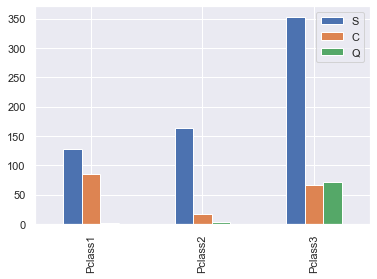

In [137]:
Pclass1 = train_data.loc[train_data['Pclass']==1,'Embarked'].value_counts()
Pclass2 = train_data.loc[train_data['Pclass']==2,'Embarked'].value_counts()
Pclass3 = train_data.loc[train_data['Pclass']==3,'Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3],index=['Pclass1','Pclass2','Pclass3'])
df.plot(kind='bar')

<p> substituir faltantes com S que representa mais de 50% dos dados em todas as classes

In [138]:
for data in full_dataset:
    data['Embarked']=data['Embarked'].fillna('S')

In [139]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [140]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pronouns
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [141]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<h3><b>Cabin

In [142]:
for data in full_dataset:
    data['Cabin']=data.Cabin.str[0]


In [143]:
data.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

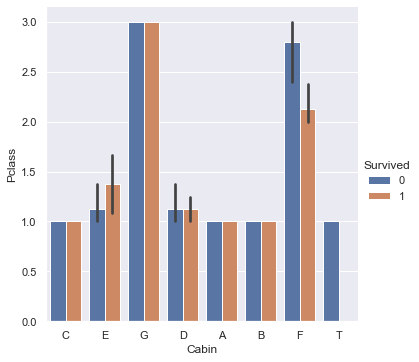

In [144]:
sns.catplot(data=train_data,x='Cabin',y='Pclass',hue='Survived',kind='bar')
#sns.displot(data=train_data,x='Age',hue='Survived',kind='kde',multiple='stack')

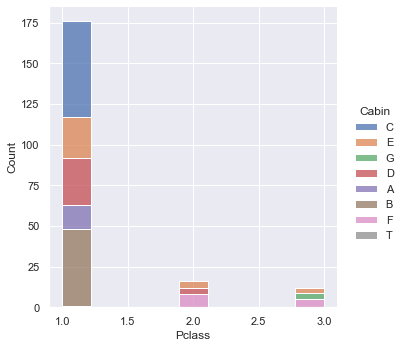

In [145]:
sns.displot(x='Pclass',hue='Cabin',multiple='stack',data=train_data)

In [146]:
train_data.groupby('Cabin').Pclass.mean()

Cabin
A    1.000000
B    1.000000
C    1.000000
D    1.121212
E    1.312500
F    2.384615
G    3.000000
T    1.000000
Name: Pclass, dtype: float64

In [150]:
#train_data.groupby(['Pclass','Embarked'])['Cabin'].transform(lambda x:x.value_counts().index[0])

0      G
1      B
2      G
3      C
4      G
      ..
886    F
887    C
888    G
889    B
890    F
Name: Cabin, Length: 891, dtype: object

In [23]:
def feature_map(data,feature):
    feature_val=data[feature].dropna().unique()
    feature_map=dict(zip(feature_val,range(len(feature_val))))
    data[feature]=data[feature].map(feature_map)
    return feature_map

for data in full_dataset:
    feature_map(data,'Cabin')
    data["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [24]:
train_data.Cabin

0      2.0
1      0.0
2      2.0
3      0.0
4      2.0
      ... 
886    4.5
887    5.0
888    2.0
889    0.0
890    2.0
Name: Cabin, Length: 891, dtype: float64

<h2><b>Family Size

In [25]:
for data in full_dataset:
    data['Family_size']=data['SibSp']+data['Parch']+1

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    object 
 12  Pronouns     891 non-null    int64  
 13  Family_size  891 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 97.6+ KB


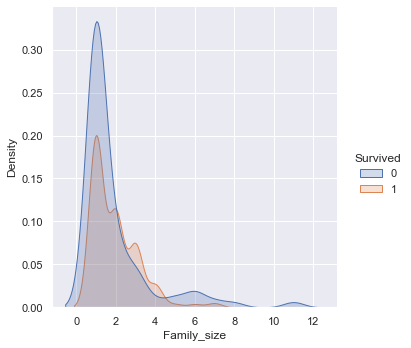

In [27]:
sns.displot(hue='Survived',x='Family_size',kind='kde',fill=True,data=train_data)

In [28]:
features_drop=['Name','SibSp','Parch']
for data in full_dataset:
    data.drop(features_drop,axis=1,inplace=True)

Labels=['Criança(0-10)','PréAdolescente(10-15)','Adolescente(15-20)','JovemAdulto(20-30)','Adulto(30-40)','Adulto(40-50)','Adulto(50-60)','Idoso(60-90)']
Age_cat=pd.cut(Dados_eng.Age,[0,10,15,20,30,40,50,60,90],labels=Labels)
print(Age_cat.value_counts())
Dados_eng['Age_cat']=Age_cat.astype('object')
#encoder=OneHotEncoder()
#Age_hot=encoder.fit_transform([Age_cat])
#Dados_eng

https://www.encyclopedia-titanica.org/titanic-victim/andrew-emslie-johnston.html

In [119]:
s=dados[False==dados['Ticket'].str.split().str[0].str.isnumeric()].Ticket.str.split().str[0].replace('[/.OQ0-9]','',regex=True)
a=s.value_counts()[:8]
a

PC         60
CA         41
STN        35
A          28
WC         10
SC          7
SCPARIS     7
C           5
Name: Ticket, dtype: int64

In [116]:
a.index

Index(['PC', 'CA', 'STN', 'A5', 'WC', 'STN2', 'A4', 'SC'], dtype='object')

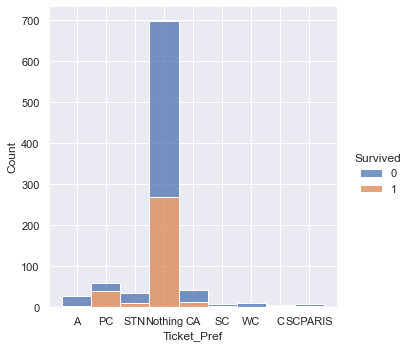

In [152]:
dados=pd.read_csv('train.csv').copy()
dados['Ticket_Pref']=dados[False==dados['Ticket'].str.split().str[0].str.isnumeric()].Ticket.str.split().str[0].replace('[/.OQ0-9]','',regex=True)
dados['Ticket_Pref']=dados['Ticket_Pref'].fillna('Nothing')
#comPref=dados.loc[False==dados['Ticket_Pref'].str.match('Nothing')]#.Pclass.value_counts()
#semPref=dados.loc[True==dados['Ticket_Pref'].str.match('Nothing')]

dados.loc[False==dados['Ticket_Pref'].isin(a.index),'Ticket_Pref']='Nothing'


#dados.Ticket_Pref.value_counts()
sns.displot(data=dados,x='Ticket_Pref',hue='Survived',multiple='stack')

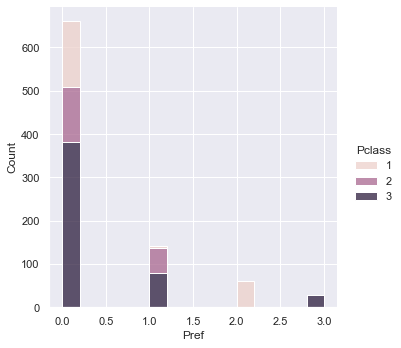

In [29]:
dados=train_data.copy()
dados['Ticket_Pref']=dados[False==dados['Ticket'].str.split().str[0].str.isnumeric()].Ticket.str.split().str[0]#.replace('.','')
dados['Ticket_Pref']=dados['Ticket_Pref'].fillna('Nothing')
#comPref=dados.loc[False==dados['Ticket_Pref'].str.match('Nothing')]#.Pclass.value_counts()
#semPref=dados.loc[True==dados['Ticket_Pref'].str.match('Nothing')]

dados.loc[False==dados['Ticket_Pref'].str.match('Nothing'),'Pref']=1
dados.loc[True==dados['Ticket_Pref'].str.match('Nothing'),'Pref']=0
dados.loc[dados['Ticket_Pref'].str.match('PC'),'Pref']=2
dados.loc[dados['Ticket_Pref'].str.match('A.*'),'Pref']=3

#dados.Ticket_Pref.value_counts()
sns.displot(data=dados,x='Pref',hue='Pclass',multiple='stack')

In [30]:
dados.Ticket_Pref.value_counts()

Nothing       661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
SOTON/O.Q.      8
CA.             8
SOTON/OQ        7
A/5.            7
STON/O2.        6
CA              6
S.O.C.          5
C               5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
LINE            4
A/4             3
S.O./P.P.       3
A/4.            3
PP              3
SC/AH           3
SOTON/O2        2
A./5.           2
P/PP            2
WE/P            2
S.C./PARIS      2
A.5.            2
S.C./A.4.       1
C.A./SOTON      1
SW/PP           1
S.P.            1
Fa              1
SC              1
A/S             1
S.O.P.          1
W.E.P.          1
F.C.            1
W/C             1
SCO/W           1
SO/C            1
A4.             1
S.W./PP         1
Name: Ticket_Pref, dtype: int64

In [31]:
for data in full_dataset:
    data['Ticket_Pref']=data[False==data['Ticket'].str.split().str[0].str.isnumeric()].Ticket.str.split().str[0]
    data['Ticket_Pref']=data['Ticket_Pref'].fillna('Nothing')

    data.loc[dados['Ticket_Pref'].str.match('Nothing'),'Pref']=0
    data.loc[False==dados['Ticket_Pref'].str.match('Nothing'),'Pref']=1
    data.loc[dados['Ticket_Pref'].str.match('PC'),'Pref']=2
    data.loc[dados['Ticket_Pref'].str.match('A.*'),'Pref']=3
    
    data.drop(['Ticket','Ticket_Pref'],axis=1,inplace=True)
    

In [32]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Pronouns,Family_size,Pref
0,1,0,3,0,22.0,7.2500,2.0,S,0,2,3.0
1,2,1,1,1,38.0,71.2833,0.0,C,2,2,2.0
2,3,1,3,1,26.0,7.9250,2.0,S,1,1,1.0
3,4,1,1,1,35.0,53.1000,0.0,S,2,2,0.0
4,5,0,3,0,35.0,8.0500,2.0,S,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,4.5,S,4,1,0.0
887,888,1,1,1,19.0,30.0000,5.0,S,1,1,0.0
888,889,0,3,1,21.0,23.4500,2.0,S,1,4,1.0
889,890,1,1,0,26.0,30.0000,0.0,C,0,1,0.0


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         417 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Pronouns     418 non-null    int64  
 8   Family_size  418 non-null    int64  
 9   Pref         418 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 32.8+ KB


<h2><b>Fare

In [34]:
#Preenchemos com a média das classes
for data in full_dataset:
    data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'),inplace=True)
    

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Pronouns     418 non-null    int64  
 8   Family_size  418 non-null    int64  
 9   Pref         418 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 32.8+ KB


<h3><b>Mutual Information

Pronouns       0.165706
Sex            0.150870
Fare           0.131193
Cabin          0.085367
Age            0.060291
Pclass         0.058107
Family_size    0.047781
Pref           0.035880
Embarked       0.014233
dtype: float64


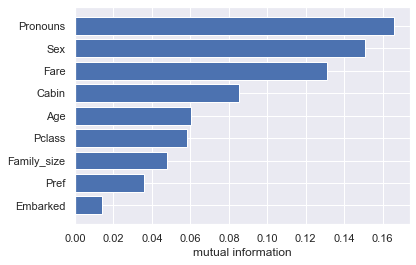

In [36]:
from sklearn.feature_selection import mutual_info_classif

def mutual_info(Dados,target='Survived'):
    X = Dados.copy().dropna()
    y = X.pop(target)

    # Label encoding for categoricals
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == 'int64'
    mi=mutual_info_classif(X,y,discrete_features=discrete_features)#para regressão usamos mutual_info_regression
    mi=pd.Series(mi,index=X.columns)
    mi=mi.sort_values(ascending=False)
    serie=mi.sort_values()
    labels=serie.index
    plt.barh(labels,serie)
    plt.xlabel('mutual information')
    print(mi)
    return mi

#Dados_eng_prep=Dados_eng.dropna().drop('Age_cat',axis=1)
mi_scores = mutual_info(train_data.drop('PassengerId',axis=1))  


<p> Referências:</p>
https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Pronouns,Family_size,Pref
0,1,0,3,0,22.0,7.2500,2.0,S,0,2,3.0
1,2,1,1,1,38.0,71.2833,0.0,C,2,2,2.0
2,3,1,3,1,26.0,7.9250,2.0,S,1,1,1.0
3,4,1,1,1,35.0,53.1000,0.0,S,2,2,0.0
4,5,0,3,0,35.0,8.0500,2.0,S,0,1,0.0


<h3><b>Data Preparation for modeling

In [38]:
X=train_data.drop('Survived',axis=1)
Y=train_data['Survived']
X_test=test_data

In [39]:
X.shape

(891, 10)

In [40]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer

cat_features=['Sex','Embarked']
num_features=['Pclass','Age','Fare','Cabin','Pronouns','Family_size','Pref']

columns=X.columns

pipeline=ColumnTransformer([

    ('cat',OneHotEncoder(handle_unknown = 'ignore'),cat_features),
    ('num',MinMaxScaler(),num_features),

])

X=pipeline.fit_transform(X)
X_test=pipeline.transform(X_test)

X.shape

(891, 12)

<h1><b>Modelling

In [153]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)


In [160]:
def cross_val(model,X,Y,cv=5,scoring='accuracy'):
    scores=cross_val_score(model,X,Y,cv=cv,scoring=scoring)
    print('Model:\t',model)
    print('Mean score:\t',round(np.mean(scores)*100, 2))
    print(60*'-')
    print('\n')

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier

models=[
    
    RandomForestClassifier(),
    SVC(kernel='rbf',probability=True),
    KNeighborsClassifier(),
    LogisticRegression(),
    SGDClassifier(loss="modified_huber")
]

for model in models:
    scores=cross_val_score(model,X,Y,cv=k_fold,scoring='accuracy')
    print('Model:\t',model)
    print('Mean score:\t',round(np.mean(scores)*100, 2))
    print(60*'-')
    print('\n')

Model:	 RandomForestClassifier()
Mean score:	 81.82
------------------------------------------------------------


Model:	 SVC(probability=True)
Mean score:	 80.92
------------------------------------------------------------


Model:	 KNeighborsClassifier()
Mean score:	 81.03
------------------------------------------------------------


Model:	 LogisticRegression()
Mean score:	 80.47
------------------------------------------------------------


Model:	 SGDClassifier(loss='modified_huber')
Mean score:	 76.65
------------------------------------------------------------




<h2><b>Hyperparameter tuning

<h3><b>RandomForest

In [166]:
def GridSearch(model,params,X,Y,cv=5,scoring='accuracy',refit=True):
    grid_search=GridSearchCV(model,params,cv=5,scoring=scoring,refit=refit)
    grid_search.fit(X,Y)
    print('Best Params:\t',grid_search.best_params_)
    print('Best Score:\t',round(grid_search.best_score_*100,2))
    return grid_search.best_estimator_

In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params=[
    {'max_depth':[9,12,13,15,20,22,23],'max_leaf_nodes':[58,60,65,70,80,90,100,110,120,150]}
]

forest=RandomForestClassifier(random_state=0)
grid_search=GridSearch(forest,params,cv=k_fold,scoring='accuracy',refit=True)

Best Params:	 {'max_depth': 12, 'max_leaf_nodes': 80}
Best Score:	 83.95


In [44]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [45]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, max_leaf_nodes=80, random_state=0)

In [46]:
forest_params=[
    {'max_depth':[9,12,13,15,20,25],'max_leaf_nodes':[50,60,65,70,80,85,90,95,100]}
]

svm_params=[
    {'C':[20,30,40,45,50,60]}
]

neighbours_params=[
    {'n_neighbors':[2,3,4,6]}
]

logistic_params=[
    {'C':[5,8,10,12,15,20,50]}
]

sgd_params=[
    {'alpha':[0.0008,0.001,0.0015]}
]

params=[forest_params,svm_params,neighbours_params,logistic_params,sgd_params]


models=[
    
    RandomForestClassifier(random_state=0),
    SVC(kernel='rbf',probability=True),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=500000,solver='lbfgs'),
    SGDClassifier(loss="modified_huber")
]

In [47]:
best_models=[]
for param,model in zip(params,models):
    grid_search=GridSearchCV(model,param,cv=k_fold,scoring='accuracy',refit=True)
    grid_search.fit(X,Y)
    best_models.append(grid_search.best_estimator_)
    print('Best model:\t',grid_search.best_estimator_)
    print('Best Score:\t',round(grid_search.best_score_*100,2))
    print(60*'-')
    print('\n')    

Best model:	 RandomForestClassifier(max_depth=12, max_leaf_nodes=80, random_state=0)
Best Score:	 83.95
------------------------------------------------------------


Best model:	 SVC(C=40, probability=True)
Best Score:	 83.39
------------------------------------------------------------


Best model:	 KNeighborsClassifier(n_neighbors=4)
Best Score:	 81.37
------------------------------------------------------------


Best model:	 LogisticRegression(C=10, max_iter=500000)
Best Score:	 81.48
------------------------------------------------------------


Best model:	 SGDClassifier(alpha=0.001, loss='modified_huber')
Best Score:	 81.6
------------------------------------------------------------




<h3><b>Deep Learning

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.15,random_state=1)
print('Train shape:\t\t',X_train.shape)
print('Validation shape:\t',X_val.shape)

Train shape:		 (757, 12)
Validation shape:	 (134, 12)


In [49]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [51]:
early_stopping=keras.callbacks.EarlyStopping(monitor='val_binary_accuracy' ,patience=100,restore_best_weights=True)
check_point=keras.callbacks.ModelCheckpoint('Model_CheckPoint.h5',save_best_only=True)

In [52]:
from functools import partial
from scikeras.wrappers import KerasClassifier

MyDense=partial(keras.layers.Dense,activation='elu',
                kernel_initializer='he_normal')

def build_model(n_hidden,n_neurons,penalty_rate,learning_rate):
    reg=keras.regularizers.l2(penalty_rate)
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_train.shape[-1],))
              
    for _ in range(n_hidden):
              model.add(MyDense(n_neurons,kernel_regularizer=reg))
              
    model.add(keras.layers.Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',kernel_regularizer=reg))
    model.compile(loss=keras.losses.binary_crossentropy,
             optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
             metrics=keras.metrics.binary_accuracy)
    return model

dnn_model=KerasClassifier(model=build_model,n_hidden=1,n_neurons=5,penalty_rate=0.001,learning_rate=0.001,
                 callbacks=[early_stopping,check_point])

In [54]:
X_train.shape

(757, 12)

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

dnn_params={
    'n_hidden': np.arange(1,10),
    'n_neurons': np.arange(1,70),
    'learning_rate': reciprocal(3e-3,3e-2),
    'penalty_rate': reciprocal(3e-5,3e-2),
}


rand_search=RandomizedSearchCV(dnn_model,dnn_params,cv=k_fold,scoring='accuracy',refit=True)
rand_search.fit(X_train,Y_train,epochs=100,
                 validation_data=(X_val,Y_val))

Epoch 1/100
22/22 [==============================] - 4s 43ms/step - loss: 0.8974 - binary_accuracy: 0.7460 - val_loss: 0.9006 - val_binary_accuracy: 0.7612
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8549 - binary_accuracy: 0.7841 - val_loss: 0.8915 - val_binary_accuracy: 0.7612
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.8390 - binary_accuracy: 0.7915 - val_loss: 0.8692 - val_binary_accuracy: 0.7761
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.8217 - binary_accuracy: 0.8047 - val_loss: 0.8640 - val_binary_accuracy: 0.7687
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8180 - binary_accuracy: 0.8062 - val_loss: 0.8663 - val_binary_accuracy: 0.7761
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8179 - binary_accuracy: 0.8062 - val_loss: 0.8572 - val_binary_accuracy: 0.7761
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - l

22/22 [==============================] - 0s 3ms/step - loss: 0.7595 - binary_accuracy: 0.8370 - val_loss: 0.8591 - val_binary_accuracy: 0.7836
Epoch 54/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7551 - binary_accuracy: 0.8429 - val_loss: 0.8445 - val_binary_accuracy: 0.7836
Epoch 55/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7525 - binary_accuracy: 0.8399 - val_loss: 0.8420 - val_binary_accuracy: 0.7910
Epoch 56/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7519 - binary_accuracy: 0.8443 - val_loss: 0.8990 - val_binary_accuracy: 0.7463
Epoch 57/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7583 - binary_accuracy: 0.8414 - val_loss: 0.8426 - val_binary_accuracy: 0.7836
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.8605 - val_loss: 0.8519 - val_binary_accuracy: 0.7836
Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 5ms/step - loss: 0.8168 - binary_accuracy: 0.7974 - val_loss: 0.8542 - val_binary_accuracy: 0.7537
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8125 - binary_accuracy: 0.8003 - val_loss: 0.8574 - val_binary_accuracy: 0.7761
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.8079 - binary_accuracy: 0.8032 - val_loss: 0.8476 - val_binary_accuracy: 0.7612
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.8006 - binary_accuracy: 0.8018 - val_loss: 0.8453 - val_binary_accuracy: 0.7612
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7967 - binary_accuracy: 0.8062 - val_loss: 0.8385 - val_binary_accuracy: 0.7761
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7906 - binary_accuracy: 0.8164 - val_loss: 0.8705 - val_binary_accuracy: 0.7761
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7910 

22/22 [==============================] - 0s 2ms/step - loss: 0.7395 - binary_accuracy: 0.8517 - val_loss: 0.8103 - val_binary_accuracy: 0.8209
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7382 - binary_accuracy: 0.8458 - val_loss: 0.8102 - val_binary_accuracy: 0.8209
Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7365 - binary_accuracy: 0.8429 - val_loss: 0.8196 - val_binary_accuracy: 0.8060
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7408 - binary_accuracy: 0.8429 - val_loss: 0.8202 - val_binary_accuracy: 0.7910
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7387 - binary_accuracy: 0.8443 - val_loss: 0.8459 - val_binary_accuracy: 0.7910
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7385 - binary_accuracy: 0.8473 - val_loss: 0.8345 - val_binary_accuracy: 0.7910
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 7ms/step - loss: 0.7819 - binary_accuracy: 0.8253 - val_loss: 0.8420 - val_binary_accuracy: 0.7761
Epoch 10/100
22/22 [==============================] - 0s 16ms/step - loss: 0.7753 - binary_accuracy: 0.8414 - val_loss: 0.8412 - val_binary_accuracy: 0.7910
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7704 - binary_accuracy: 0.8297 - val_loss: 0.8583 - val_binary_accuracy: 0.7836
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7707 - binary_accuracy: 0.8429 - val_loss: 0.8468 - val_binary_accuracy: 0.7910
Epoch 13/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7680 - binary_accuracy: 0.8458 - val_loss: 0.8412 - val_binary_accuracy: 0.8060
Epoch 14/100
22/22 [==============================] - 0s 8ms/step - loss: 0.7653 - binary_accuracy: 0.8443 - val_loss: 0.8380 - val_binary_accuracy: 0.7836
Epoch 15/100
22/22 [==============================] - 0s 5ms/step - loss: 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.7300 - binary_accuracy: 0.8502 - val_loss: 0.8260 - val_binary_accuracy: 0.8134
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7328 - binary_accuracy: 0.8605 - val_loss: 0.8555 - val_binary_accuracy: 0.7687
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7304 - binary_accuracy: 0.8605 - val_loss: 0.8986 - val_binary_accuracy: 0.7761
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7330 - binary_accuracy: 0.8576 - val_loss: 0.8592 - val_binary_accuracy: 0.7836
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7303 - binary_accuracy: 0.8576 - val_loss: 0.8465 - val_binary_accuracy: 0.7985
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7363 - binary_accuracy: 0.8414 - val_loss: 0.8368 - val_binary_accuracy: 0.7836
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7733 - binary_accuracy: 0.8311 - val_loss: 0.8340 - val_binary_accuracy: 0.7836
Epoch 14/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7724 - binary_accuracy: 0.8311 - val_loss: 0.8491 - val_binary_accuracy: 0.7687
Epoch 15/100
22/22 [==============================] - 0s 10ms/step - loss: 0.7740 - binary_accuracy: 0.8341 - val_loss: 0.8319 - val_binary_accuracy: 0.7910
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7712 - binary_accuracy: 0.8311 - val_loss: 0.8335 - val_binary_accuracy: 0.7761
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7669 - binary_accuracy: 0.8282 - val_loss: 0.8424 - val_binary_accuracy: 0.7836
Epoch 18/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7676 - binary_accuracy: 0.8253 - val_loss: 0.8291 - val_binary_accuracy: 0.7836
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.7288 - binary_accuracy: 0.8502 - val_loss: 0.8480 - val_binary_accuracy: 0.7687
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7333 - binary_accuracy: 0.8458 - val_loss: 0.8295 - val_binary_accuracy: 0.7761
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7310 - binary_accuracy: 0.8502 - val_loss: 0.8312 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7322 - binary_accuracy: 0.8590 - val_loss: 0.8678 - val_binary_accuracy: 0.7687
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7297 - binary_accuracy: 0.8532 - val_loss: 0.8382 - val_binary_accuracy: 0.7985
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7246 - binary_accuracy: 0.8576 - val_loss: 0.8334 - val_binary_accuracy: 0.7836
Epoch 71/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.8488 - val_loss: 0.8489 - val_binary_accuracy: 0.7761
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7416 - binary_accuracy: 0.8473 - val_loss: 0.8395 - val_binary_accuracy: 0.7687
Epoch 19/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7422 - binary_accuracy: 0.8546 - val_loss: 0.8330 - val_binary_accuracy: 0.7836
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7403 - binary_accuracy: 0.8532 - val_loss: 0.8476 - val_binary_accuracy: 0.7910
Epoch 21/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7410 - binary_accuracy: 0.8502 - val_loss: 0.8313 - val_binary_accuracy: 0.7985
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7408 - binary_accuracy: 0.8326 - val_loss: 0.8501 - val_binary_accuracy: 0.7687
Epoch 23/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7033 - binary_accuracy: 0.8649 - val_loss: 0.8303 - val_binary_accuracy: 0.7761
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7022 - binary_accuracy: 0.8605 - val_loss: 0.8330 - val_binary_accuracy: 0.7985
Epoch 71/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7069 - binary_accuracy: 0.8620 - val_loss: 0.8615 - val_binary_accuracy: 0.7761
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7032 - binary_accuracy: 0.8649 - val_loss: 0.8414 - val_binary_accuracy: 0.7836
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7052 - binary_accuracy: 0.8634 - val_loss: 0.8506 - val_binary_accuracy: 0.8060
Epoch 74/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7082 - binary_accuracy: 0.8605 - val_loss: 0.8319 - val_binary_accuracy: 0.8060
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7612 - binary_accuracy: 0.8443 - val_loss: 0.8564 - val_binary_accuracy: 0.7612
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7594 - binary_accuracy: 0.8561 - val_loss: 0.8671 - val_binary_accuracy: 0.7761
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7582 - binary_accuracy: 0.8517 - val_loss: 0.8666 - val_binary_accuracy: 0.7612
Epoch 19/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7567 - binary_accuracy: 0.8502 - val_loss: 0.8617 - val_binary_accuracy: 0.7612
Epoch 20/100
22/22 [==============================] - 0s 8ms/step - loss: 0.7545 - binary_accuracy: 0.8429 - val_loss: 0.8486 - val_binary_accuracy: 0.7836
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7509 - binary_accuracy: 0.8488 - val_loss: 0.8738 - val_binary_accuracy: 0.7761
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7347 - binary_accuracy: 0.8590 - val_loss: 0.8537 - val_binary_accuracy: 0.7836
Epoch 69/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7261 - binary_accuracy: 0.8634 - val_loss: 0.8832 - val_binary_accuracy: 0.7761
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7298 - binary_accuracy: 0.8532 - val_loss: 0.8587 - val_binary_accuracy: 0.7761
Epoch 71/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7267 - binary_accuracy: 0.8576 - val_loss: 0.8699 - val_binary_accuracy: 0.7910
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7322 - binary_accuracy: 0.8620 - val_loss: 0.8538 - val_binary_accuracy: 0.7761
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7305 - binary_accuracy: 0.8517 - val_loss: 0.9001 - val_binary_accuracy: 0.7761
Epoch 74/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7764 - binary_accuracy: 0.8311 - val_loss: 0.8434 - val_binary_accuracy: 0.7836
Epoch 16/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7706 - binary_accuracy: 0.8326 - val_loss: 0.8474 - val_binary_accuracy: 0.7761
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7749 - binary_accuracy: 0.8341 - val_loss: 0.8470 - val_binary_accuracy: 0.7761
Epoch 18/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7753 - binary_accuracy: 0.8326 - val_loss: 0.8331 - val_binary_accuracy: 0.7836
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7721 - binary_accuracy: 0.8355 - val_loss: 0.8378 - val_binary_accuracy: 0.7985
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7720 - binary_accuracy: 0.8429 - val_loss: 0.8457 - val_binary_accuracy: 0.7761
Epoch 21/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7450 - binary_accuracy: 0.8458 - val_loss: 0.8203 - val_binary_accuracy: 0.7910
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7465 - binary_accuracy: 0.8532 - val_loss: 0.8340 - val_binary_accuracy: 0.7836
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7417 - binary_accuracy: 0.8502 - val_loss: 0.8266 - val_binary_accuracy: 0.7910
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7428 - binary_accuracy: 0.8488 - val_loss: 0.8443 - val_binary_accuracy: 0.7836
Epoch 71/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7469 - binary_accuracy: 0.8502 - val_loss: 0.8184 - val_binary_accuracy: 0.7761
Epoch 72/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7415 - binary_accuracy: 0.8502 - val_loss: 0.8257 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7557 - binary_accuracy: 0.8490 - val_loss: 0.8448 - val_binary_accuracy: 0.7761
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7580 - binary_accuracy: 0.8519 - val_loss: 0.8533 - val_binary_accuracy: 0.7985
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7581 - binary_accuracy: 0.8446 - val_loss: 0.8329 - val_binary_accuracy: 0.8060
Epoch 22/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7547 - binary_accuracy: 0.8416 - val_loss: 0.8255 - val_binary_accuracy: 0.7910
Epoch 23/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7552 - binary_accuracy: 0.8446 - val_loss: 0.8335 - val_binary_accuracy: 0.7836
Epoch 24/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7531 - binary_accuracy: 0.8548 - val_loss: 0.8624 - val_binary_accuracy: 0.7612
Epoch 25/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7307 - binary_accuracy: 0.8607 - val_loss: 0.8487 - val_binary_accuracy: 0.7836
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7300 - binary_accuracy: 0.8592 - val_loss: 0.8260 - val_binary_accuracy: 0.7910
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7284 - binary_accuracy: 0.8636 - val_loss: 0.8203 - val_binary_accuracy: 0.7985
Epoch 74/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7280 - binary_accuracy: 0.8548 - val_loss: 0.8248 - val_binary_accuracy: 0.7836
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7253 - binary_accuracy: 0.8519 - val_loss: 0.8248 - val_binary_accuracy: 0.8134
Epoch 76/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7285 - binary_accuracy: 0.8563 - val_loss: 0.8201 - val_binary_accuracy: 0.7910
Epoch 77/100
22/22 [==============================] - 0s 13ms/step - loss: 0.

22/22 [==============================] - 0s 2ms/step - loss: 0.7492 - binary_accuracy: 0.8563 - val_loss: 0.8304 - val_binary_accuracy: 0.7761
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7461 - binary_accuracy: 0.8475 - val_loss: 0.9157 - val_binary_accuracy: 0.7761
Epoch 25/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7493 - binary_accuracy: 0.8504 - val_loss: 0.8330 - val_binary_accuracy: 0.7910
Epoch 26/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7457 - binary_accuracy: 0.8563 - val_loss: 0.8565 - val_binary_accuracy: 0.7836
Epoch 27/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7457 - binary_accuracy: 0.8490 - val_loss: 0.8922 - val_binary_accuracy: 0.7910
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7419 - binary_accuracy: 0.8475 - val_loss: 0.8447 - val_binary_accuracy: 0.7687
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7183 - binary_accuracy: 0.8592 - val_loss: 0.8406 - val_binary_accuracy: 0.7761
Epoch 76/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7174 - binary_accuracy: 0.8666 - val_loss: 0.8814 - val_binary_accuracy: 0.7537
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7292 - binary_accuracy: 0.8578 - val_loss: 0.8294 - val_binary_accuracy: 0.7910
Epoch 78/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7154 - binary_accuracy: 0.8710 - val_loss: 0.8378 - val_binary_accuracy: 0.7910
Epoch 79/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7176 - binary_accuracy: 0.8651 - val_loss: 0.8480 - val_binary_accuracy: 0.7761
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7168 - binary_accuracy: 0.8695 - val_loss: 0.8447 - val_binary_accuracy: 0.7612
Epoch 81/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7621 - binary_accuracy: 0.8299 - val_loss: 0.8481 - val_binary_accuracy: 0.7463
Epoch 28/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7603 - binary_accuracy: 0.8328 - val_loss: 0.8405 - val_binary_accuracy: 0.7687
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7593 - binary_accuracy: 0.8387 - val_loss: 0.8507 - val_binary_accuracy: 0.7612
Epoch 30/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7649 - binary_accuracy: 0.8240 - val_loss: 0.8735 - val_binary_accuracy: 0.7612
Epoch 31/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7592 - binary_accuracy: 0.8372 - val_loss: 0.8451 - val_binary_accuracy: 0.7836
Epoch 32/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7597 - binary_accuracy: 0.8328 - val_loss: 0.8598 - val_binary_accuracy: 0.7463
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7405 - binary_accuracy: 0.8475 - val_loss: 0.8317 - val_binary_accuracy: 0.7612
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7375 - binary_accuracy: 0.8504 - val_loss: 0.8218 - val_binary_accuracy: 0.7910
Epoch 81/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7279 - binary_accuracy: 0.8563 - val_loss: 0.8612 - val_binary_accuracy: 0.7612
Epoch 82/100
22/22 [==============================] - 0s 10ms/step - loss: 0.7325 - binary_accuracy: 0.8519 - val_loss: 0.8125 - val_binary_accuracy: 0.7761
Epoch 83/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7348 - binary_accuracy: 0.8519 - val_loss: 0.8943 - val_binary_accuracy: 0.7687
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7369 - binary_accuracy: 0.8490 - val_loss: 0.8471 - val_binary_accuracy: 0.7612
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.

22/22 [==============================] - 0s 2ms/step - loss: 0.4100 - binary_accuracy: 0.8576 - val_loss: 0.4915 - val_binary_accuracy: 0.7985
Epoch 32/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4105 - binary_accuracy: 0.8429 - val_loss: 0.4848 - val_binary_accuracy: 0.7761
Epoch 33/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4142 - binary_accuracy: 0.8429 - val_loss: 0.5181 - val_binary_accuracy: 0.7761
Epoch 34/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4096 - binary_accuracy: 0.8429 - val_loss: 0.4924 - val_binary_accuracy: 0.7761
Epoch 35/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4105 - binary_accuracy: 0.8399 - val_loss: 0.4841 - val_binary_accuracy: 0.7761
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4036 - binary_accuracy: 0.8590 - val_loss: 0.5187 - val_binary_accuracy: 0.7761
Epoch 37/100
22/22 [==============================] - 0s 2ms/step - loss: 0.

22/22 [==============================] - 0s 2ms/step - loss: 0.3748 - binary_accuracy: 0.8634 - val_loss: 0.5202 - val_binary_accuracy: 0.7836
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3767 - binary_accuracy: 0.8664 - val_loss: 0.5290 - val_binary_accuracy: 0.7687
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3781 - binary_accuracy: 0.8576 - val_loss: 0.5332 - val_binary_accuracy: 0.7687
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3680 - binary_accuracy: 0.8649 - val_loss: 0.5360 - val_binary_accuracy: 0.7612
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3766 - binary_accuracy: 0.8605 - val_loss: 0.5094 - val_binary_accuracy: 0.7910
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3718 - binary_accuracy: 0.8664 - val_loss: 0.5147 - val_binary_accuracy: 0.7910
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.4030 - binary_accuracy: 0.8458 - val_loss: 0.4921 - val_binary_accuracy: 0.7910
Epoch 36/100
22/22 [==============================] - 0s 10ms/step - loss: 0.4041 - binary_accuracy: 0.8370 - val_loss: 0.4794 - val_binary_accuracy: 0.8060
Epoch 37/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3929 - binary_accuracy: 0.8488 - val_loss: 0.4825 - val_binary_accuracy: 0.7985
Epoch 38/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4030 - binary_accuracy: 0.8443 - val_loss: 0.4786 - val_binary_accuracy: 0.7910
Epoch 39/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4040 - binary_accuracy: 0.8458 - val_loss: 0.5178 - val_binary_accuracy: 0.7687
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4024 - binary_accuracy: 0.8443 - val_loss: 0.4888 - val_binary_accuracy: 0.7761
Epoch 41/100
22/22 [==============================] - 0s 2ms/step - loss: 0.

22/22 [==============================] - 0s 2ms/step - loss: 0.3686 - binary_accuracy: 0.8634 - val_loss: 0.5019 - val_binary_accuracy: 0.7836
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3768 - binary_accuracy: 0.8561 - val_loss: 0.5055 - val_binary_accuracy: 0.7985
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3674 - binary_accuracy: 0.8634 - val_loss: 0.5162 - val_binary_accuracy: 0.7761
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3638 - binary_accuracy: 0.8576 - val_loss: 0.5140 - val_binary_accuracy: 0.7910
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.8664 - val_loss: 0.5324 - val_binary_accuracy: 0.7687
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3752 - binary_accuracy: 0.8664 - val_loss: 0.5191 - val_binary_accuracy: 0.8134
Epoch 93/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

Epoch 39/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3865 - binary_accuracy: 0.8576 - val_loss: 0.4981 - val_binary_accuracy: 0.7836
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3925 - binary_accuracy: 0.8546 - val_loss: 0.5026 - val_binary_accuracy: 0.7836
Epoch 41/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3856 - binary_accuracy: 0.8605 - val_loss: 0.5064 - val_binary_accuracy: 0.8060
Epoch 42/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3871 - binary_accuracy: 0.8634 - val_loss: 0.5468 - val_binary_accuracy: 0.7687
Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3881 - binary_accuracy: 0.8620 - val_loss: 0.5008 - val_binary_accuracy: 0.7687
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3910 - binary_accuracy: 0.8546 - val_loss: 0.5319 - val_binary_accuracy: 0.7761
Epoch 45/100
22/22 [==============================] - 0s 2ms/ste

22/22 [==============================] - 0s 2ms/step - loss: 0.3635 - binary_accuracy: 0.8605 - val_loss: 0.5356 - val_binary_accuracy: 0.7612
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3591 - binary_accuracy: 0.8796 - val_loss: 0.5121 - val_binary_accuracy: 0.7910
Epoch 93/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3637 - binary_accuracy: 0.8649 - val_loss: 0.5463 - val_binary_accuracy: 0.7761
Epoch 94/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3652 - binary_accuracy: 0.8664 - val_loss: 0.5325 - val_binary_accuracy: 0.7687
Epoch 95/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3614 - binary_accuracy: 0.8781 - val_loss: 0.5291 - val_binary_accuracy: 0.7612
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3682 - binary_accuracy: 0.8722 - val_loss: 0.5179 - val_binary_accuracy: 0.7985
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.3864 - binary_accuracy: 0.8576 - val_loss: 0.5030 - val_binary_accuracy: 0.7687
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3825 - binary_accuracy: 0.8532 - val_loss: 0.5381 - val_binary_accuracy: 0.7463
Epoch 45/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3799 - binary_accuracy: 0.8576 - val_loss: 0.5166 - val_binary_accuracy: 0.7388
Epoch 46/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3802 - binary_accuracy: 0.8620 - val_loss: 0.5633 - val_binary_accuracy: 0.7463
Epoch 47/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3892 - binary_accuracy: 0.8502 - val_loss: 0.5171 - val_binary_accuracy: 0.7910
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3816 - binary_accuracy: 0.8590 - val_loss: 0.5183 - val_binary_accuracy: 0.7836
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.3511 - binary_accuracy: 0.8634 - val_loss: 0.5526 - val_binary_accuracy: 0.7612
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3512 - binary_accuracy: 0.8752 - val_loss: 0.5466 - val_binary_accuracy: 0.7761
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3523 - binary_accuracy: 0.8693 - val_loss: 0.5324 - val_binary_accuracy: 0.7985
Epoch 98/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3538 - binary_accuracy: 0.8678 - val_loss: 0.5395 - val_binary_accuracy: 0.7985
Epoch 99/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3555 - binary_accuracy: 0.8767 - val_loss: 0.5384 - val_binary_accuracy: 0.7910
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100
22/22 [==============================] - 1s 19ms/step - loss: 0.5125 - binary_accuracy: 0.7636 - val_loss: 0.6316 - val_binary_accuracy: 0.6866
Epoch 2/100


22/22 [==============================] - 0s 2ms/step - loss: 0.3970 - binary_accuracy: 0.8517 - val_loss: 0.5229 - val_binary_accuracy: 0.7836
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3928 - binary_accuracy: 0.8546 - val_loss: 0.5086 - val_binary_accuracy: 0.7985
Epoch 49/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3874 - binary_accuracy: 0.8502 - val_loss: 0.5000 - val_binary_accuracy: 0.7836
Epoch 50/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3860 - binary_accuracy: 0.8532 - val_loss: 0.5834 - val_binary_accuracy: 0.7164
Epoch 51/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3966 - binary_accuracy: 0.8546 - val_loss: 0.5141 - val_binary_accuracy: 0.7985
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3858 - binary_accuracy: 0.8605 - val_loss: 0.5375 - val_binary_accuracy: 0.7910
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.3655 - binary_accuracy: 0.8605 - val_loss: 0.5071 - val_binary_accuracy: 0.7985
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 19ms/step - loss: 0.5545 - binary_accuracy: 0.7680 - val_loss: 0.5601 - val_binary_accuracy: 0.7687
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4752 - binary_accuracy: 0.8003 - val_loss: 0.5478 - val_binary_accuracy: 0.7761
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4650 - binary_accuracy: 0.8106 - val_loss: 0.5575 - val_binary_accuracy: 0.7463
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4464 - binary_accuracy: 0.8253 - val_loss: 0.5233 - val_binary_accuracy: 0.7836
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4441 - binary_accuracy: 0.8282 - val_loss: 0.5274 - val_binary_accuracy: 0.7612
Epoch 6/100
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.3846 - binary_accuracy: 0.8605 - val_loss: 0.5152 - val_binary_accuracy: 0.7761
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3887 - binary_accuracy: 0.8590 - val_loss: 0.5328 - val_binary_accuracy: 0.7910
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3890 - binary_accuracy: 0.8532 - val_loss: 0.5150 - val_binary_accuracy: 0.7761
Epoch 54/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3883 - binary_accuracy: 0.8473 - val_loss: 0.5248 - val_binary_accuracy: 0.7836
Epoch 55/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3827 - binary_accuracy: 0.8502 - val_loss: 0.5044 - val_binary_accuracy: 0.7761
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3819 - binary_accuracy: 0.8443 - val_loss: 0.5360 - val_binary_accuracy: 0.7687
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 6ms/step - loss: 0.4733 - binary_accuracy: 0.8003 - val_loss: 0.5480 - val_binary_accuracy: 0.7612
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4496 - binary_accuracy: 0.8238 - val_loss: 0.5677 - val_binary_accuracy: 0.7612
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4473 - binary_accuracy: 0.8209 - val_loss: 0.5290 - val_binary_accuracy: 0.7687
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.4502 - binary_accuracy: 0.8209 - val_loss: 0.5207 - val_binary_accuracy: 0.7687
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4406 - binary_accuracy: 0.8370 - val_loss: 0.5339 - val_binary_accuracy: 0.7537
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4380 - binary_accuracy: 0.8282 - val_loss: 0.6219 - val_binary_accuracy: 0.7612
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4339 - 

22/22 [==============================] - 0s 2ms/step - loss: 0.3858 - binary_accuracy: 0.8458 - val_loss: 0.5237 - val_binary_accuracy: 0.7761
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3854 - binary_accuracy: 0.8546 - val_loss: 0.5160 - val_binary_accuracy: 0.7612
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3838 - binary_accuracy: 0.8605 - val_loss: 0.5573 - val_binary_accuracy: 0.7761
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3848 - binary_accuracy: 0.8546 - val_loss: 0.5108 - val_binary_accuracy: 0.7836
Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3853 - binary_accuracy: 0.8532 - val_loss: 0.5293 - val_binary_accuracy: 0.7761
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3803 - binary_accuracy: 0.8561 - val_loss: 0.5051 - val_binary_accuracy: 0.7910
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.4493 - binary_accuracy: 0.8240 - val_loss: 0.5173 - val_binary_accuracy: 0.7612
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4306 - binary_accuracy: 0.8416 - val_loss: 0.5257 - val_binary_accuracy: 0.7836
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 0.4301 - binary_accuracy: 0.8343 - val_loss: 0.5009 - val_binary_accuracy: 0.7910
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4248 - binary_accuracy: 0.8358 - val_loss: 0.5185 - val_binary_accuracy: 0.7687
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4231 - binary_accuracy: 0.8255 - val_loss: 0.5158 - val_binary_accuracy: 0.7463
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4309 - binary_accuracy: 0.8314 - val_loss: 0.5426 - val_binary_accuracy: 0.7687
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 0.41

22/22 [==============================] - 0s 2ms/step - loss: 0.3724 - binary_accuracy: 0.8607 - val_loss: 0.4898 - val_binary_accuracy: 0.7910
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3730 - binary_accuracy: 0.8666 - val_loss: 0.4978 - val_binary_accuracy: 0.8134
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3765 - binary_accuracy: 0.8504 - val_loss: 0.5303 - val_binary_accuracy: 0.7687
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3755 - binary_accuracy: 0.8504 - val_loss: 0.4905 - val_binary_accuracy: 0.7910
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3711 - binary_accuracy: 0.8607 - val_loss: 0.4897 - val_binary_accuracy: 0.7985
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3703 - binary_accuracy: 0.8622 - val_loss: 0.4817 - val_binary_accuracy: 0.7836
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 2ms/step - loss: 0.4208 - binary_accuracy: 0.8460 - val_loss: 0.5657 - val_binary_accuracy: 0.7537
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4123 - binary_accuracy: 0.8460 - val_loss: 0.5278 - val_binary_accuracy: 0.7612
Epoch 13/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4202 - binary_accuracy: 0.8416 - val_loss: 0.4860 - val_binary_accuracy: 0.7687
Epoch 14/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4087 - binary_accuracy: 0.8504 - val_loss: 0.4945 - val_binary_accuracy: 0.7612
Epoch 15/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4167 - binary_accuracy: 0.8416 - val_loss: 0.4975 - val_binary_accuracy: 0.7836
Epoch 16/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4202 - binary_accuracy: 0.8372 - val_loss: 0.5846 - val_binary_accuracy: 0.7537
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.

22/22 [==============================] - 0s 2ms/step - loss: 0.3774 - binary_accuracy: 0.8724 - val_loss: 0.5094 - val_binary_accuracy: 0.7910
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3732 - binary_accuracy: 0.8666 - val_loss: 0.5003 - val_binary_accuracy: 0.7910
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3723 - binary_accuracy: 0.8666 - val_loss: 0.5218 - val_binary_accuracy: 0.7761
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3729 - binary_accuracy: 0.8754 - val_loss: 0.4948 - val_binary_accuracy: 0.7910
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3689 - binary_accuracy: 0.8710 - val_loss: 0.5104 - val_binary_accuracy: 0.7985
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3742 - binary_accuracy: 0.8622 - val_loss: 0.4948 - val_binary_accuracy: 0.7836
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 3ms/step - loss: 0.4388 - binary_accuracy: 0.8314 - val_loss: 0.6319 - val_binary_accuracy: 0.7313
Epoch 16/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4367 - binary_accuracy: 0.8240 - val_loss: 0.5007 - val_binary_accuracy: 0.7761
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4296 - binary_accuracy: 0.8284 - val_loss: 0.5268 - val_binary_accuracy: 0.7761
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4344 - binary_accuracy: 0.8358 - val_loss: 0.5014 - val_binary_accuracy: 0.7836
Epoch 19/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4302 - binary_accuracy: 0.8358 - val_loss: 0.5426 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4324 - binary_accuracy: 0.8372 - val_loss: 0.5460 - val_binary_accuracy: 0.7537
Epoch 21/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4

22/22 [==============================] - 0s 2ms/step - loss: 0.3921 - binary_accuracy: 0.8592 - val_loss: 0.5144 - val_binary_accuracy: 0.7910
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3939 - binary_accuracy: 0.8416 - val_loss: 0.4972 - val_binary_accuracy: 0.7910
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3959 - binary_accuracy: 0.8548 - val_loss: 0.4991 - val_binary_accuracy: 0.7836
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3973 - binary_accuracy: 0.8563 - val_loss: 0.5084 - val_binary_accuracy: 0.7761
Epoch 71/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3878 - binary_accuracy: 0.8592 - val_loss: 0.4869 - val_binary_accuracy: 0.7910
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3910 - binary_accuracy: 0.8592 - val_loss: 0.5223 - val_binary_accuracy: 0.7985
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3

22/22 [==============================] - 0s 9ms/step - loss: 1.5864 - binary_accuracy: 0.8018 - val_loss: 1.6284 - val_binary_accuracy: 0.7836
Epoch 20/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5793 - binary_accuracy: 0.8003 - val_loss: 1.6220 - val_binary_accuracy: 0.7836
Epoch 21/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5718 - binary_accuracy: 0.7974 - val_loss: 1.6170 - val_binary_accuracy: 0.7910
Epoch 22/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5653 - binary_accuracy: 0.8032 - val_loss: 1.6096 - val_binary_accuracy: 0.7910
Epoch 23/100
22/22 [==============================] - 0s 7ms/step - loss: 1.5584 - binary_accuracy: 0.8062 - val_loss: 1.6048 - val_binary_accuracy: 0.7910
Epoch 24/100
22/22 [==============================] - 0s 8ms/step - loss: 1.5507 - binary_accuracy: 0.8062 - val_loss: 1.5970 - val_binary_accuracy: 0.7910
Epoch 25/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5

22/22 [==============================] - 0s 4ms/step - loss: 1.3076 - binary_accuracy: 0.8282 - val_loss: 1.3671 - val_binary_accuracy: 0.7687
Epoch 72/100
22/22 [==============================] - 0s 5ms/step - loss: 1.3030 - binary_accuracy: 0.8267 - val_loss: 1.3625 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2983 - binary_accuracy: 0.8267 - val_loss: 1.3562 - val_binary_accuracy: 0.7761
Epoch 74/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2943 - binary_accuracy: 0.8238 - val_loss: 1.3542 - val_binary_accuracy: 0.7836
Epoch 75/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2897 - binary_accuracy: 0.8223 - val_loss: 1.3514 - val_binary_accuracy: 0.7910
Epoch 76/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2858 - binary_accuracy: 0.8253 - val_loss: 1.3441 - val_binary_accuracy: 0.7761
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2

22/22 [==============================] - 0s 4ms/step - loss: 1.5210 - binary_accuracy: 0.8032 - val_loss: 1.5749 - val_binary_accuracy: 0.7836
Epoch 24/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5151 - binary_accuracy: 0.8076 - val_loss: 1.5677 - val_binary_accuracy: 0.7910
Epoch 25/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5098 - binary_accuracy: 0.8076 - val_loss: 1.5627 - val_binary_accuracy: 0.7910
Epoch 26/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5039 - binary_accuracy: 0.8062 - val_loss: 1.5578 - val_binary_accuracy: 0.7836
Epoch 27/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4980 - binary_accuracy: 0.8062 - val_loss: 1.5529 - val_binary_accuracy: 0.7836
Epoch 28/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4921 - binary_accuracy: 0.8179 - val_loss: 1.5466 - val_binary_accuracy: 0.7836
Epoch 29/100
22/22 [==============================] - 0s 7ms/step - loss: 1.4

22/22 [==============================] - 0s 4ms/step - loss: 1.2684 - binary_accuracy: 0.8194 - val_loss: 1.3228 - val_binary_accuracy: 0.7761
Epoch 76/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2645 - binary_accuracy: 0.8223 - val_loss: 1.3198 - val_binary_accuracy: 0.7836
Epoch 77/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2602 - binary_accuracy: 0.8164 - val_loss: 1.3150 - val_binary_accuracy: 0.7836
Epoch 78/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2562 - binary_accuracy: 0.8164 - val_loss: 1.3106 - val_binary_accuracy: 0.7761
Epoch 79/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2527 - binary_accuracy: 0.8194 - val_loss: 1.3061 - val_binary_accuracy: 0.7761
Epoch 80/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2482 - binary_accuracy: 0.8194 - val_loss: 1.3025 - val_binary_accuracy: 0.7761
Epoch 81/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2

22/22 [==============================] - 0s 4ms/step - loss: 1.5334 - binary_accuracy: 0.8238 - val_loss: 1.5808 - val_binary_accuracy: 0.7836
Epoch 28/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5271 - binary_accuracy: 0.8076 - val_loss: 1.5744 - val_binary_accuracy: 0.7761
Epoch 29/100
22/22 [==============================] - 0s 13ms/step - loss: 1.5211 - binary_accuracy: 0.8164 - val_loss: 1.5681 - val_binary_accuracy: 0.7687
Epoch 30/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5156 - binary_accuracy: 0.8091 - val_loss: 1.5644 - val_binary_accuracy: 0.7836
Epoch 31/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5088 - binary_accuracy: 0.8120 - val_loss: 1.5597 - val_binary_accuracy: 0.7836
Epoch 32/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5035 - binary_accuracy: 0.8135 - val_loss: 1.5548 - val_binary_accuracy: 0.7761
Epoch 33/100
22/22 [==============================] - 0s 5ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.2739 - binary_accuracy: 0.8223 - val_loss: 1.3357 - val_binary_accuracy: 0.7761
Epoch 80/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2698 - binary_accuracy: 0.8209 - val_loss: 1.3300 - val_binary_accuracy: 0.7761
Epoch 81/100
22/22 [==============================] - 0s 12ms/step - loss: 1.2657 - binary_accuracy: 0.8253 - val_loss: 1.3266 - val_binary_accuracy: 0.7761
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2613 - binary_accuracy: 0.8297 - val_loss: 1.3268 - val_binary_accuracy: 0.7761
Epoch 83/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2571 - binary_accuracy: 0.8282 - val_loss: 1.3207 - val_binary_accuracy: 0.7761
Epoch 84/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2535 - binary_accuracy: 0.8253 - val_loss: 1.3160 - val_binary_accuracy: 0.7761
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.5227 - binary_accuracy: 0.8150 - val_loss: 1.5793 - val_binary_accuracy: 0.7612
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5166 - binary_accuracy: 0.8062 - val_loss: 1.5747 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5111 - binary_accuracy: 0.8047 - val_loss: 1.5710 - val_binary_accuracy: 0.7612
Epoch 34/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5052 - binary_accuracy: 0.8135 - val_loss: 1.5651 - val_binary_accuracy: 0.7612
Epoch 35/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4999 - binary_accuracy: 0.8120 - val_loss: 1.5576 - val_binary_accuracy: 0.7612
Epoch 36/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4947 - binary_accuracy: 0.8150 - val_loss: 1.5528 - val_binary_accuracy: 0.7612
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4

22/22 [==============================] - 0s 4ms/step - loss: 1.2700 - binary_accuracy: 0.8209 - val_loss: 1.3336 - val_binary_accuracy: 0.7612
Epoch 84/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2652 - binary_accuracy: 0.8194 - val_loss: 1.3256 - val_binary_accuracy: 0.7836
Epoch 85/100
22/22 [==============================] - 0s 11ms/step - loss: 1.2621 - binary_accuracy: 0.8267 - val_loss: 1.3229 - val_binary_accuracy: 0.7761
Epoch 86/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2571 - binary_accuracy: 0.8223 - val_loss: 1.3192 - val_binary_accuracy: 0.7612
Epoch 87/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2534 - binary_accuracy: 0.8223 - val_loss: 1.3182 - val_binary_accuracy: 0.7537
Epoch 88/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2491 - binary_accuracy: 0.8209 - val_loss: 1.3118 - val_binary_accuracy: 0.7612
Epoch 89/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.4575 - binary_accuracy: 0.8238 - val_loss: 1.5270 - val_binary_accuracy: 0.7985
Epoch 36/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4517 - binary_accuracy: 0.8194 - val_loss: 1.5214 - val_binary_accuracy: 0.7985
Epoch 37/100
22/22 [==============================] - 0s 12ms/step - loss: 1.4466 - binary_accuracy: 0.8209 - val_loss: 1.5162 - val_binary_accuracy: 0.7985
Epoch 38/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4409 - binary_accuracy: 0.8209 - val_loss: 1.5109 - val_binary_accuracy: 0.7910
Epoch 39/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4358 - binary_accuracy: 0.8223 - val_loss: 1.5053 - val_binary_accuracy: 0.7910
Epoch 40/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4305 - binary_accuracy: 0.8179 - val_loss: 1.5014 - val_binary_accuracy: 0.7985
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

22/22 [==============================] - 0s 3ms/step - loss: 1.2160 - binary_accuracy: 0.8326 - val_loss: 1.2946 - val_binary_accuracy: 0.7910
Epoch 88/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2121 - binary_accuracy: 0.8267 - val_loss: 1.2882 - val_binary_accuracy: 0.7836
Epoch 89/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2084 - binary_accuracy: 0.8355 - val_loss: 1.2839 - val_binary_accuracy: 0.7836
Epoch 90/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2049 - binary_accuracy: 0.8355 - val_loss: 1.2816 - val_binary_accuracy: 0.7836
Epoch 91/100
22/22 [==============================] - 0s 6ms/step - loss: 1.2005 - binary_accuracy: 0.8370 - val_loss: 1.2777 - val_binary_accuracy: 0.7836
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 1.1964 - binary_accuracy: 0.8355 - val_loss: 1.2754 - val_binary_accuracy: 0.7836
Epoch 93/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1

22/22 [==============================] - 0s 4ms/step - loss: 1.4565 - binary_accuracy: 0.8150 - val_loss: 1.5085 - val_binary_accuracy: 0.7612
Epoch 40/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4526 - binary_accuracy: 0.8209 - val_loss: 1.5039 - val_binary_accuracy: 0.7761
Epoch 41/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4470 - binary_accuracy: 0.8106 - val_loss: 1.4990 - val_binary_accuracy: 0.7761
Epoch 42/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4409 - binary_accuracy: 0.8135 - val_loss: 1.4940 - val_binary_accuracy: 0.7761
Epoch 43/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4365 - binary_accuracy: 0.8179 - val_loss: 1.4874 - val_binary_accuracy: 0.7761
Epoch 44/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4302 - binary_accuracy: 0.8194 - val_loss: 1.4824 - val_binary_accuracy: 0.7761
Epoch 45/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4

22/22 [==============================] - 0s 5ms/step - loss: 1.2212 - binary_accuracy: 0.8311 - val_loss: 1.2802 - val_binary_accuracy: 0.7761
Epoch 92/100
22/22 [==============================] - 0s 6ms/step - loss: 1.2168 - binary_accuracy: 0.8297 - val_loss: 1.2798 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2134 - binary_accuracy: 0.8341 - val_loss: 1.2717 - val_binary_accuracy: 0.7687
Epoch 94/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2091 - binary_accuracy: 0.8370 - val_loss: 1.2693 - val_binary_accuracy: 0.7761
Epoch 95/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2051 - binary_accuracy: 0.8355 - val_loss: 1.2640 - val_binary_accuracy: 0.7687
Epoch 96/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2019 - binary_accuracy: 0.8326 - val_loss: 1.2597 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1

22/22 [==============================] - 0s 4ms/step - loss: 1.3904 - binary_accuracy: 0.8150 - val_loss: 1.4474 - val_binary_accuracy: 0.7910
Epoch 44/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3854 - binary_accuracy: 0.8120 - val_loss: 1.4419 - val_binary_accuracy: 0.7910
Epoch 45/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3807 - binary_accuracy: 0.8135 - val_loss: 1.4376 - val_binary_accuracy: 0.7910
Epoch 46/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3755 - binary_accuracy: 0.8135 - val_loss: 1.4337 - val_binary_accuracy: 0.7910
Epoch 47/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3712 - binary_accuracy: 0.8150 - val_loss: 1.4284 - val_binary_accuracy: 0.7910
Epoch 48/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3664 - binary_accuracy: 0.8164 - val_loss: 1.4221 - val_binary_accuracy: 0.7910
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3

22/22 [==============================] - 0s 4ms/step - loss: 1.1731 - binary_accuracy: 0.8164 - val_loss: 1.2327 - val_binary_accuracy: 0.7836
Epoch 96/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1692 - binary_accuracy: 0.8164 - val_loss: 1.2290 - val_binary_accuracy: 0.7836
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 1.1656 - binary_accuracy: 0.8135 - val_loss: 1.2298 - val_binary_accuracy: 0.7985
Epoch 98/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1627 - binary_accuracy: 0.8223 - val_loss: 1.2217 - val_binary_accuracy: 0.7836
Epoch 99/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1588 - binary_accuracy: 0.8164 - val_loss: 1.2177 - val_binary_accuracy: 0.7836
Epoch 100/100
3/3 [==============================] - 0s 999us/step
Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 1.7525 - binary_accuracy: 0.7111 - val_loss: 1.7124 - val_binary_accuracy: 0.7537
Epoch 2/10

22/22 [==============================] - 0s 4ms/step - loss: 1.3556 - binary_accuracy: 0.8270 - val_loss: 1.4151 - val_binary_accuracy: 0.7836
Epoch 48/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3496 - binary_accuracy: 0.8299 - val_loss: 1.4080 - val_binary_accuracy: 0.7761
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3447 - binary_accuracy: 0.8328 - val_loss: 1.4024 - val_binary_accuracy: 0.7910
Epoch 50/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3405 - binary_accuracy: 0.8314 - val_loss: 1.3982 - val_binary_accuracy: 0.7761
Epoch 51/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3357 - binary_accuracy: 0.8284 - val_loss: 1.3957 - val_binary_accuracy: 0.7836
Epoch 52/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3316 - binary_accuracy: 0.8255 - val_loss: 1.3914 - val_binary_accuracy: 0.7761
Epoch 53/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3

22/22 [==============================] - 0s 3ms/step - loss: 1.1439 - binary_accuracy: 0.8343 - val_loss: 1.2087 - val_binary_accuracy: 0.7687
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 1.8400 - binary_accuracy: 0.6745 - val_loss: 1.7386 - val_binary_accuracy: 0.7612
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6740 - binary_accuracy: 0.7977 - val_loss: 1.7120 - val_binary_accuracy: 0.7761
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6537 - binary_accuracy: 0.7991 - val_loss: 1.6996 - val_binary_accuracy: 0.7612
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6405 - binary_accuracy: 0.7962 - val_loss: 1.6891 - val_binary_accuracy: 0.7612
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6319 - binary_accuracy: 0.7889 - val_loss: 1.6849 - val_binary_accuracy: 0.7687
Epoch 6/100
22/2

22/22 [==============================] - 0s 4ms/step - loss: 1.3658 - binary_accuracy: 0.8226 - val_loss: 1.4366 - val_binary_accuracy: 0.7910
Epoch 52/100
22/22 [==============================] - 0s 13ms/step - loss: 1.3606 - binary_accuracy: 0.8255 - val_loss: 1.4328 - val_binary_accuracy: 0.7910
Epoch 53/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3564 - binary_accuracy: 0.8255 - val_loss: 1.4269 - val_binary_accuracy: 0.7910
Epoch 54/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3512 - binary_accuracy: 0.8299 - val_loss: 1.4262 - val_binary_accuracy: 0.7761
Epoch 55/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3471 - binary_accuracy: 0.8270 - val_loss: 1.4228 - val_binary_accuracy: 0.7687
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3425 - binary_accuracy: 0.8226 - val_loss: 1.4143 - val_binary_accuracy: 0.7910
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.7379 - binary_accuracy: 0.7713 - val_loss: 1.7571 - val_binary_accuracy: 0.7537
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7079 - binary_accuracy: 0.7874 - val_loss: 1.7342 - val_binary_accuracy: 0.7463
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6879 - binary_accuracy: 0.7815 - val_loss: 1.7186 - val_binary_accuracy: 0.7313
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6735 - binary_accuracy: 0.7801 - val_loss: 1.7073 - val_binary_accuracy: 0.7463
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6613 - binary_accuracy: 0.7786 - val_loss: 1.6958 - val_binary_accuracy: 0.7463
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6505 - binary_accuracy: 0.7801 - val_loss: 1.6884 - val_binary_accuracy: 0.7463
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6418 - 

22/22 [==============================] - 0s 3ms/step - loss: 1.3777 - binary_accuracy: 0.8226 - val_loss: 1.4280 - val_binary_accuracy: 0.7836
Epoch 56/100
22/22 [==============================] - 0s 12ms/step - loss: 1.3732 - binary_accuracy: 0.8226 - val_loss: 1.4229 - val_binary_accuracy: 0.7910
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3674 - binary_accuracy: 0.8240 - val_loss: 1.4180 - val_binary_accuracy: 0.7910
Epoch 58/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3631 - binary_accuracy: 0.8226 - val_loss: 1.4141 - val_binary_accuracy: 0.7910
Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3585 - binary_accuracy: 0.8240 - val_loss: 1.4087 - val_binary_accuracy: 0.7910
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3536 - binary_accuracy: 0.8226 - val_loss: 1.4039 - val_binary_accuracy: 0.7910
Epoch 61/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

22/22 [==============================] - 0s 3ms/step - loss: 1.7299 - binary_accuracy: 0.7988 - val_loss: 1.7226 - val_binary_accuracy: 0.7836
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6570 - binary_accuracy: 0.7974 - val_loss: 1.6546 - val_binary_accuracy: 0.7836
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5894 - binary_accuracy: 0.7974 - val_loss: 1.5920 - val_binary_accuracy: 0.7836
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5263 - binary_accuracy: 0.7988 - val_loss: 1.5306 - val_binary_accuracy: 0.7836
Epoch 11/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4666 - binary_accuracy: 0.7988 - val_loss: 1.4742 - val_binary_accuracy: 0.7836
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4113 - binary_accuracy: 0.7959 - val_loss: 1.4187 - val_binary_accuracy: 0.7761
Epoch 13/100
22/22 [==============================] - 0s 3ms/step - loss: 1.359

22/22 [==============================] - 0s 3ms/step - loss: 0.5988 - binary_accuracy: 0.7974 - val_loss: 0.6359 - val_binary_accuracy: 0.7761
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5958 - binary_accuracy: 0.7959 - val_loss: 0.6326 - val_binary_accuracy: 0.7687
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5935 - binary_accuracy: 0.7959 - val_loss: 0.6301 - val_binary_accuracy: 0.7687
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5908 - binary_accuracy: 0.7944 - val_loss: 0.6277 - val_binary_accuracy: 0.7687
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5886 - binary_accuracy: 0.7944 - val_loss: 0.6265 - val_binary_accuracy: 0.7761
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5865 - binary_accuracy: 0.7959 - val_loss: 0.6238 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 1.5745 - binary_accuracy: 0.7797 - val_loss: 1.5700 - val_binary_accuracy: 0.7687
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5134 - binary_accuracy: 0.7797 - val_loss: 1.5109 - val_binary_accuracy: 0.7687
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4567 - binary_accuracy: 0.7797 - val_loss: 1.4572 - val_binary_accuracy: 0.7687
Epoch 14/100
22/22 [==============================] - 0s 13ms/step - loss: 1.4028 - binary_accuracy: 0.7797 - val_loss: 1.4059 - val_binary_accuracy: 0.7687
Epoch 15/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3524 - binary_accuracy: 0.7797 - val_loss: 1.3571 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3053 - binary_accuracy: 0.7797 - val_loss: 1.3104 - val_binary_accuracy: 0.7687
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 1.

22/22 [==============================] - 0s 3ms/step - loss: 0.6027 - binary_accuracy: 0.7812 - val_loss: 0.6293 - val_binary_accuracy: 0.7687
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6001 - binary_accuracy: 0.7812 - val_loss: 0.6275 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5980 - binary_accuracy: 0.7812 - val_loss: 0.6254 - val_binary_accuracy: 0.7687
Epoch 66/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5958 - binary_accuracy: 0.7827 - val_loss: 0.6232 - val_binary_accuracy: 0.7687
Epoch 67/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5936 - binary_accuracy: 0.7812 - val_loss: 0.6216 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5917 - binary_accuracy: 0.7812 - val_loss: 0.6194 - val_binary_accuracy: 0.7687
Epoch 69/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 1.3144 - binary_accuracy: 0.7841 - val_loss: 1.3247 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2688 - binary_accuracy: 0.7856 - val_loss: 1.2810 - val_binary_accuracy: 0.7687
Epoch 17/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2262 - binary_accuracy: 0.7856 - val_loss: 1.2400 - val_binary_accuracy: 0.7687
Epoch 18/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1865 - binary_accuracy: 0.7856 - val_loss: 1.2013 - val_binary_accuracy: 0.7687
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1485 - binary_accuracy: 0.7856 - val_loss: 1.1644 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1133 - binary_accuracy: 0.7856 - val_loss: 1.1306 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0

22/22 [==============================] - 0s 3ms/step - loss: 0.5856 - binary_accuracy: 0.7885 - val_loss: 0.6205 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5836 - binary_accuracy: 0.7871 - val_loss: 0.6191 - val_binary_accuracy: 0.7687
Epoch 69/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5819 - binary_accuracy: 0.7871 - val_loss: 0.6170 - val_binary_accuracy: 0.7687
Epoch 70/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5802 - binary_accuracy: 0.7871 - val_loss: 0.6156 - val_binary_accuracy: 0.7687
Epoch 71/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5786 - binary_accuracy: 0.7900 - val_loss: 0.6141 - val_binary_accuracy: 0.7687
Epoch 72/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5772 - binary_accuracy: 0.7885 - val_loss: 0.6130 - val_binary_accuracy: 0.7761
Epoch 73/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 1.2116 - binary_accuracy: 0.7900 - val_loss: 1.2272 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1723 - binary_accuracy: 0.7900 - val_loss: 1.1895 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1354 - binary_accuracy: 0.7900 - val_loss: 1.1553 - val_binary_accuracy: 0.7687
Epoch 22/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1013 - binary_accuracy: 0.7900 - val_loss: 1.1215 - val_binary_accuracy: 0.7687
Epoch 23/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0686 - binary_accuracy: 0.7900 - val_loss: 1.0891 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0377 - binary_accuracy: 0.7900 - val_loss: 1.0597 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 1.0

22/22 [==============================] - 0s 4ms/step - loss: 0.5796 - binary_accuracy: 0.7915 - val_loss: 0.6166 - val_binary_accuracy: 0.7687
Epoch 72/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5778 - binary_accuracy: 0.7915 - val_loss: 0.6152 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5765 - binary_accuracy: 0.7915 - val_loss: 0.6127 - val_binary_accuracy: 0.7687
Epoch 74/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5749 - binary_accuracy: 0.7915 - val_loss: 0.6107 - val_binary_accuracy: 0.7687
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5737 - binary_accuracy: 0.7915 - val_loss: 0.6107 - val_binary_accuracy: 0.7687
Epoch 76/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5722 - binary_accuracy: 0.7915 - val_loss: 0.6082 - val_binary_accuracy: 0.7687
Epoch 77/100
22/22 [==============================] - 0s 3ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 1.0216 - binary_accuracy: 0.7988 - val_loss: 1.0557 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9931 - binary_accuracy: 0.7988 - val_loss: 1.0282 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9664 - binary_accuracy: 0.7988 - val_loss: 1.0016 - val_binary_accuracy: 0.7687
Epoch 26/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9412 - binary_accuracy: 0.7988 - val_loss: 0.9774 - val_binary_accuracy: 0.7687
Epoch 27/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9178 - binary_accuracy: 0.7988 - val_loss: 0.9551 - val_binary_accuracy: 0.7687
Epoch 28/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8953 - binary_accuracy: 0.7988 - val_loss: 0.9351 - val_binary_accuracy: 0.7687
Epoch 29/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8

22/22 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_accuracy: 0.7988 - val_loss: 0.6120 - val_binary_accuracy: 0.7687
Epoch 76/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5612 - binary_accuracy: 0.7988 - val_loss: 0.6111 - val_binary_accuracy: 0.7687
Epoch 77/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5603 - binary_accuracy: 0.8003 - val_loss: 0.6087 - val_binary_accuracy: 0.7687
Epoch 78/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5592 - binary_accuracy: 0.7988 - val_loss: 0.6067 - val_binary_accuracy: 0.7687
Epoch 79/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_accuracy: 0.7988 - val_loss: 0.6066 - val_binary_accuracy: 0.7687
Epoch 80/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5572 - binary_accuracy: 0.7988 - val_loss: 0.6058 - val_binary_accuracy: 0.7687
Epoch 81/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 0.9310 - binary_accuracy: 0.7900 - val_loss: 0.9595 - val_binary_accuracy: 0.7687
Epoch 28/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9086 - binary_accuracy: 0.7930 - val_loss: 0.9377 - val_binary_accuracy: 0.7687
Epoch 29/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8873 - binary_accuracy: 0.7930 - val_loss: 0.9173 - val_binary_accuracy: 0.7687
Epoch 30/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8674 - binary_accuracy: 0.7930 - val_loss: 0.8977 - val_binary_accuracy: 0.7687
Epoch 31/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8486 - binary_accuracy: 0.7930 - val_loss: 0.8795 - val_binary_accuracy: 0.7687
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8311 - binary_accuracy: 0.7930 - val_loss: 0.8625 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.5683 - binary_accuracy: 0.7915 - val_loss: 0.6065 - val_binary_accuracy: 0.7687
Epoch 80/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5675 - binary_accuracy: 0.7930 - val_loss: 0.6048 - val_binary_accuracy: 0.7687
Epoch 81/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5669 - binary_accuracy: 0.7915 - val_loss: 0.6039 - val_binary_accuracy: 0.7687
Epoch 82/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_accuracy: 0.7915 - val_loss: 0.6031 - val_binary_accuracy: 0.7687
Epoch 83/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5649 - binary_accuracy: 0.7915 - val_loss: 0.6025 - val_binary_accuracy: 0.7687
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5641 - binary_accuracy: 0.7915 - val_loss: 0.6019 - val_binary_accuracy: 0.7687
Epoch 85/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 0.8408 - binary_accuracy: 0.7915 - val_loss: 0.8747 - val_binary_accuracy: 0.7687
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8238 - binary_accuracy: 0.7915 - val_loss: 0.8566 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8078 - binary_accuracy: 0.7915 - val_loss: 0.8417 - val_binary_accuracy: 0.7687
Epoch 34/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7926 - binary_accuracy: 0.7915 - val_loss: 0.8258 - val_binary_accuracy: 0.7687
Epoch 35/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7785 - binary_accuracy: 0.7915 - val_loss: 0.8129 - val_binary_accuracy: 0.7687
Epoch 36/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7653 - binary_accuracy: 0.7915 - val_loss: 0.7996 - val_binary_accuracy: 0.7687
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7

22/22 [==============================] - 0s 6ms/step - loss: 0.5629 - binary_accuracy: 0.7915 - val_loss: 0.6015 - val_binary_accuracy: 0.7687
Epoch 84/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5621 - binary_accuracy: 0.7915 - val_loss: 0.6007 - val_binary_accuracy: 0.7687
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5614 - binary_accuracy: 0.7915 - val_loss: 0.5996 - val_binary_accuracy: 0.7687
Epoch 86/100
22/22 [==============================] - 0s 12ms/step - loss: 0.5609 - binary_accuracy: 0.7915 - val_loss: 0.5995 - val_binary_accuracy: 0.7687
Epoch 87/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5602 - binary_accuracy: 0.7915 - val_loss: 0.5992 - val_binary_accuracy: 0.7687
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5596 - binary_accuracy: 0.7915 - val_loss: 0.5989 - val_binary_accuracy: 0.7687
Epoch 89/100
22/22 [==============================] - 0s 3ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.7871 - binary_accuracy: 0.7918 - val_loss: 0.8200 - val_binary_accuracy: 0.7836
Epoch 36/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7730 - binary_accuracy: 0.7933 - val_loss: 0.8062 - val_binary_accuracy: 0.7836
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7599 - binary_accuracy: 0.7933 - val_loss: 0.7940 - val_binary_accuracy: 0.7836
Epoch 38/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7475 - binary_accuracy: 0.7933 - val_loss: 0.7815 - val_binary_accuracy: 0.7836
Epoch 39/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7359 - binary_accuracy: 0.7918 - val_loss: 0.7694 - val_binary_accuracy: 0.7836
Epoch 40/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7251 - binary_accuracy: 0.7918 - val_loss: 0.7592 - val_binary_accuracy: 0.7836
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7

22/22 [==============================] - 0s 6ms/step - loss: 0.5599 - binary_accuracy: 0.7918 - val_loss: 0.6002 - val_binary_accuracy: 0.7761
Epoch 88/100
22/22 [==============================] - 0s 10ms/step - loss: 0.5593 - binary_accuracy: 0.7918 - val_loss: 0.5992 - val_binary_accuracy: 0.7761
Epoch 89/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5588 - binary_accuracy: 0.7918 - val_loss: 0.5983 - val_binary_accuracy: 0.7761
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5581 - binary_accuracy: 0.7918 - val_loss: 0.5982 - val_binary_accuracy: 0.7761
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5579 - binary_accuracy: 0.7918 - val_loss: 0.5987 - val_binary_accuracy: 0.7761
Epoch 92/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5574 - binary_accuracy: 0.7933 - val_loss: 0.5974 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 5ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.7390 - binary_accuracy: 0.7991 - val_loss: 0.7803 - val_binary_accuracy: 0.7687
Epoch 40/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7275 - binary_accuracy: 0.7991 - val_loss: 0.7694 - val_binary_accuracy: 0.7687
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7169 - binary_accuracy: 0.7991 - val_loss: 0.7590 - val_binary_accuracy: 0.7687
Epoch 42/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7067 - binary_accuracy: 0.7991 - val_loss: 0.7491 - val_binary_accuracy: 0.7687
Epoch 43/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6971 - binary_accuracy: 0.7991 - val_loss: 0.7389 - val_binary_accuracy: 0.7687
Epoch 44/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6881 - binary_accuracy: 0.7991 - val_loss: 0.7308 - val_binary_accuracy: 0.7687
Epoch 45/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6

22/22 [==============================] - 0s 3ms/step - loss: 0.5531 - binary_accuracy: 0.7991 - val_loss: 0.5982 - val_binary_accuracy: 0.7687
Epoch 92/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5526 - binary_accuracy: 0.7991 - val_loss: 0.5969 - val_binary_accuracy: 0.7687
Epoch 93/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5520 - binary_accuracy: 0.7991 - val_loss: 0.5970 - val_binary_accuracy: 0.7687
Epoch 94/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5516 - binary_accuracy: 0.7991 - val_loss: 0.5973 - val_binary_accuracy: 0.7687
Epoch 95/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5513 - binary_accuracy: 0.7991 - val_loss: 0.5979 - val_binary_accuracy: 0.7687
Epoch 96/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5513 - binary_accuracy: 0.7991 - val_loss: 0.5961 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 0.7021 - binary_accuracy: 0.7889 - val_loss: 0.7331 - val_binary_accuracy: 0.7687
Epoch 44/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6932 - binary_accuracy: 0.7889 - val_loss: 0.7243 - val_binary_accuracy: 0.7687
Epoch 45/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6851 - binary_accuracy: 0.7889 - val_loss: 0.7163 - val_binary_accuracy: 0.7687
Epoch 46/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6773 - binary_accuracy: 0.7889 - val_loss: 0.7092 - val_binary_accuracy: 0.7687
Epoch 47/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6702 - binary_accuracy: 0.7889 - val_loss: 0.7023 - val_binary_accuracy: 0.7687
Epoch 48/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6635 - binary_accuracy: 0.7889 - val_loss: 0.6950 - val_binary_accuracy: 0.7687
Epoch 49/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6

22/22 [==============================] - 0s 3ms/step - loss: 0.5603 - binary_accuracy: 0.7889 - val_loss: 0.5956 - val_binary_accuracy: 0.7687
Epoch 96/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5599 - binary_accuracy: 0.7889 - val_loss: 0.5949 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5598 - binary_accuracy: 0.7889 - val_loss: 0.5950 - val_binary_accuracy: 0.7687
Epoch 98/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5593 - binary_accuracy: 0.7889 - val_loss: 0.5937 - val_binary_accuracy: 0.7687
Epoch 99/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5588 - binary_accuracy: 0.7889 - val_loss: 0.5945 - val_binary_accuracy: 0.7687
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 2.0362 - binary_accuracy: 0.6182 - val_loss: 1.9442 - val_binary_accuracy: 0.7388
Epoch 2/100


22/22 [==============================] - 0s 4ms/step - loss: 1.6765 - binary_accuracy: 0.8370 - val_loss: 1.7432 - val_binary_accuracy: 0.7687
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6750 - binary_accuracy: 0.8355 - val_loss: 1.7598 - val_binary_accuracy: 0.7687
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6722 - binary_accuracy: 0.8311 - val_loss: 1.7313 - val_binary_accuracy: 0.7910
Epoch 50/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6704 - binary_accuracy: 0.8326 - val_loss: 1.7293 - val_binary_accuracy: 0.7910
Epoch 51/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6672 - binary_accuracy: 0.8370 - val_loss: 1.7308 - val_binary_accuracy: 0.7910
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6641 - binary_accuracy: 0.8297 - val_loss: 1.7447 - val_binary_accuracy: 0.7687
Epoch 53/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6

22/22 [==============================] - 0s 2ms/step - loss: 1.5613 - binary_accuracy: 0.8443 - val_loss: 1.6244 - val_binary_accuracy: 0.7836
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 1.9487 - binary_accuracy: 0.6990 - val_loss: 1.8892 - val_binary_accuracy: 0.7687
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 1.8564 - binary_accuracy: 0.7518 - val_loss: 1.8582 - val_binary_accuracy: 0.7687
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 1.8336 - binary_accuracy: 0.7606 - val_loss: 1.8518 - val_binary_accuracy: 0.7537
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.8203 - binary_accuracy: 0.7577 - val_loss: 1.8445 - val_binary_accuracy: 0.7612
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 1.8115 - binary_accuracy: 0.7739 - val_loss: 1.8414 - val_binary_accuracy: 0.7761
Epoch 6/100
22/2

22/22 [==============================] - 0s 5ms/step - loss: 1.6545 - binary_accuracy: 0.8341 - val_loss: 1.7107 - val_binary_accuracy: 0.7910
Epoch 52/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6510 - binary_accuracy: 0.8297 - val_loss: 1.7086 - val_binary_accuracy: 0.7985
Epoch 53/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6478 - binary_accuracy: 0.8370 - val_loss: 1.7065 - val_binary_accuracy: 0.8060
Epoch 54/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6427 - binary_accuracy: 0.8326 - val_loss: 1.7201 - val_binary_accuracy: 0.7687
Epoch 55/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6445 - binary_accuracy: 0.8385 - val_loss: 1.7060 - val_binary_accuracy: 0.7910
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6406 - binary_accuracy: 0.8370 - val_loss: 1.7015 - val_binary_accuracy: 0.8134
Epoch 57/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6

22/22 [==============================] - 0s 5ms/step - loss: 1.8614 - binary_accuracy: 0.7959 - val_loss: 1.8651 - val_binary_accuracy: 0.7910
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.8428 - binary_accuracy: 0.7856 - val_loss: 1.8575 - val_binary_accuracy: 0.7910
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 1.8271 - binary_accuracy: 0.7959 - val_loss: 1.8598 - val_binary_accuracy: 0.7612
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 1.8157 - binary_accuracy: 0.8047 - val_loss: 1.8489 - val_binary_accuracy: 0.7612
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 1.8088 - binary_accuracy: 0.8062 - val_loss: 1.8407 - val_binary_accuracy: 0.7836
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7997 - binary_accuracy: 0.8106 - val_loss: 1.8402 - val_binary_accuracy: 0.7687
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7939 - 

22/22 [==============================] - 0s 4ms/step - loss: 1.6486 - binary_accuracy: 0.8414 - val_loss: 1.7312 - val_binary_accuracy: 0.7612
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6444 - binary_accuracy: 0.8502 - val_loss: 1.7346 - val_binary_accuracy: 0.7612
Epoch 57/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6427 - binary_accuracy: 0.8473 - val_loss: 1.7265 - val_binary_accuracy: 0.7612
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6405 - binary_accuracy: 0.8517 - val_loss: 1.7368 - val_binary_accuracy: 0.7761
Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6397 - binary_accuracy: 0.8488 - val_loss: 1.7247 - val_binary_accuracy: 0.7687
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6342 - binary_accuracy: 0.8458 - val_loss: 1.7199 - val_binary_accuracy: 0.7687
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6

Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7831 - binary_accuracy: 0.8018 - val_loss: 1.8587 - val_binary_accuracy: 0.7761
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7778 - binary_accuracy: 0.7900 - val_loss: 1.8626 - val_binary_accuracy: 0.7761
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7748 - binary_accuracy: 0.7988 - val_loss: 1.8523 - val_binary_accuracy: 0.7836
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7674 - binary_accuracy: 0.8032 - val_loss: 1.8564 - val_binary_accuracy: 0.7687
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7647 - binary_accuracy: 0.8047 - val_loss: 1.8464 - val_binary_accuracy: 0.7687
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7619 - binary_accuracy: 0.7988 - val_loss: 1.8501 - val_binary_accuracy: 0.7687
Epoch 13/100
22/22 [==============================] - 0s 4ms/step -

22/22 [==============================] - 0s 5ms/step - loss: 1.6279 - binary_accuracy: 0.8341 - val_loss: 1.7149 - val_binary_accuracy: 0.7537
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6223 - binary_accuracy: 0.8238 - val_loss: 1.7151 - val_binary_accuracy: 0.7537
Epoch 61/100
22/22 [==============================] - 0s 6ms/step - loss: 1.6227 - binary_accuracy: 0.8297 - val_loss: 1.7143 - val_binary_accuracy: 0.7537
Epoch 62/100
22/22 [==============================] - 0s 6ms/step - loss: 1.6201 - binary_accuracy: 0.8253 - val_loss: 1.7104 - val_binary_accuracy: 0.7612
Epoch 63/100
22/22 [==============================] - 0s 5ms/step - loss: 1.6146 - binary_accuracy: 0.8341 - val_loss: 1.7023 - val_binary_accuracy: 0.7836
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6169 - binary_accuracy: 0.8311 - val_loss: 1.7048 - val_binary_accuracy: 0.7910
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6

22/22 [==============================] - 0s 4ms/step - loss: 1.7490 - binary_accuracy: 0.8311 - val_loss: 1.8296 - val_binary_accuracy: 0.7687
Epoch 12/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7451 - binary_accuracy: 0.8311 - val_loss: 1.8246 - val_binary_accuracy: 0.7761
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7407 - binary_accuracy: 0.8282 - val_loss: 1.8258 - val_binary_accuracy: 0.7687
Epoch 14/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7375 - binary_accuracy: 0.8223 - val_loss: 1.8204 - val_binary_accuracy: 0.7687
Epoch 15/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7331 - binary_accuracy: 0.8282 - val_loss: 1.8151 - val_binary_accuracy: 0.7761
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7296 - binary_accuracy: 0.8341 - val_loss: 1.8182 - val_binary_accuracy: 0.7612
Epoch 17/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7

22/22 [==============================] - 0s 5ms/step - loss: 1.6085 - binary_accuracy: 0.8502 - val_loss: 1.6999 - val_binary_accuracy: 0.7612
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6064 - binary_accuracy: 0.8429 - val_loss: 1.6963 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6044 - binary_accuracy: 0.8443 - val_loss: 1.6979 - val_binary_accuracy: 0.7687
Epoch 66/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6011 - binary_accuracy: 0.8429 - val_loss: 1.6936 - val_binary_accuracy: 0.7687
Epoch 67/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5990 - binary_accuracy: 0.8458 - val_loss: 1.6924 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5964 - binary_accuracy: 0.8429 - val_loss: 1.6935 - val_binary_accuracy: 0.7612
Epoch 69/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5

22/22 [==============================] - 0s 2ms/step - loss: 1.7564 - binary_accuracy: 0.8179 - val_loss: 1.8174 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 7ms/step - loss: 1.7526 - binary_accuracy: 0.8106 - val_loss: 1.8109 - val_binary_accuracy: 0.7761
Epoch 17/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7492 - binary_accuracy: 0.8209 - val_loss: 1.8086 - val_binary_accuracy: 0.7761
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7452 - binary_accuracy: 0.8179 - val_loss: 1.8108 - val_binary_accuracy: 0.7836
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7419 - binary_accuracy: 0.8253 - val_loss: 1.8052 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7388 - binary_accuracy: 0.8194 - val_loss: 1.8031 - val_binary_accuracy: 0.7836
Epoch 21/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7

22/22 [==============================] - 0s 10ms/step - loss: 1.6088 - binary_accuracy: 0.8399 - val_loss: 1.6925 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6073 - binary_accuracy: 0.8326 - val_loss: 1.6980 - val_binary_accuracy: 0.7612
Epoch 69/100
22/22 [==============================] - 0s 6ms/step - loss: 1.6041 - binary_accuracy: 0.8341 - val_loss: 1.6856 - val_binary_accuracy: 0.7761
Epoch 70/100
22/22 [==============================] - 0s 6ms/step - loss: 1.6020 - binary_accuracy: 0.8385 - val_loss: 1.6818 - val_binary_accuracy: 0.7687
Epoch 71/100
22/22 [==============================] - 0s 7ms/step - loss: 1.5997 - binary_accuracy: 0.8414 - val_loss: 1.6793 - val_binary_accuracy: 0.7687
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5978 - binary_accuracy: 0.8399 - val_loss: 1.6809 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.7127 - binary_accuracy: 0.8209 - val_loss: 1.7786 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7091 - binary_accuracy: 0.8194 - val_loss: 1.7797 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7053 - binary_accuracy: 0.8223 - val_loss: 1.7718 - val_binary_accuracy: 0.7761
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7018 - binary_accuracy: 0.8179 - val_loss: 1.7728 - val_binary_accuracy: 0.7687
Epoch 23/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6996 - binary_accuracy: 0.8223 - val_loss: 1.7787 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 7ms/step - loss: 1.6981 - binary_accuracy: 0.8238 - val_loss: 1.7715 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6

22/22 [==============================] - 0s 2ms/step - loss: 1.5770 - binary_accuracy: 0.8414 - val_loss: 1.6646 - val_binary_accuracy: 0.7761
Epoch 72/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5741 - binary_accuracy: 0.8414 - val_loss: 1.6413 - val_binary_accuracy: 0.7910
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5693 - binary_accuracy: 0.8458 - val_loss: 1.6469 - val_binary_accuracy: 0.7910
Epoch 74/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5688 - binary_accuracy: 0.8355 - val_loss: 1.6539 - val_binary_accuracy: 0.7761
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5683 - binary_accuracy: 0.8385 - val_loss: 1.6469 - val_binary_accuracy: 0.7836
Epoch 76/100
22/22 [==============================] - 0s 9ms/step - loss: 1.5663 - binary_accuracy: 0.8399 - val_loss: 1.6341 - val_binary_accuracy: 0.7836
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5

22/22 [==============================] - 0s 2ms/step - loss: 1.7353 - binary_accuracy: 0.8314 - val_loss: 1.8126 - val_binary_accuracy: 0.7761
Epoch 24/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7281 - binary_accuracy: 0.8343 - val_loss: 1.8212 - val_binary_accuracy: 0.7836
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7271 - binary_accuracy: 0.8328 - val_loss: 1.8019 - val_binary_accuracy: 0.7612
Epoch 26/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7209 - binary_accuracy: 0.8358 - val_loss: 1.7967 - val_binary_accuracy: 0.7836
Epoch 27/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7196 - binary_accuracy: 0.8328 - val_loss: 1.8021 - val_binary_accuracy: 0.7761
Epoch 28/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7138 - binary_accuracy: 0.8387 - val_loss: 1.7936 - val_binary_accuracy: 0.7687
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7

22/22 [==============================] - 0s 2ms/step - loss: 1.5929 - binary_accuracy: 0.8563 - val_loss: 1.6828 - val_binary_accuracy: 0.7687
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5915 - binary_accuracy: 0.8490 - val_loss: 1.6728 - val_binary_accuracy: 0.7761
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5901 - binary_accuracy: 0.8504 - val_loss: 1.6717 - val_binary_accuracy: 0.7910
Epoch 78/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5871 - binary_accuracy: 0.8504 - val_loss: 1.6806 - val_binary_accuracy: 0.7687
Epoch 79/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5865 - binary_accuracy: 0.8519 - val_loss: 1.6659 - val_binary_accuracy: 0.7761
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5855 - binary_accuracy: 0.8460 - val_loss: 1.6666 - val_binary_accuracy: 0.7687
Epoch 81/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5

22/22 [==============================] - 0s 7ms/step - loss: 1.7150 - binary_accuracy: 0.8284 - val_loss: 1.7984 - val_binary_accuracy: 0.7761
Epoch 28/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7119 - binary_accuracy: 0.8299 - val_loss: 1.7924 - val_binary_accuracy: 0.7612
Epoch 29/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7091 - binary_accuracy: 0.8358 - val_loss: 1.7872 - val_binary_accuracy: 0.7687
Epoch 30/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7068 - binary_accuracy: 0.8343 - val_loss: 1.7849 - val_binary_accuracy: 0.7687
Epoch 31/100
22/22 [==============================] - 0s 2ms/step - loss: 1.7042 - binary_accuracy: 0.8358 - val_loss: 1.7851 - val_binary_accuracy: 0.7687
Epoch 32/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7001 - binary_accuracy: 0.8343 - val_loss: 1.7827 - val_binary_accuracy: 0.7612
Epoch 33/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6

22/22 [==============================] - 0s 4ms/step - loss: 1.5875 - binary_accuracy: 0.8592 - val_loss: 1.6680 - val_binary_accuracy: 0.7910
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5862 - binary_accuracy: 0.8578 - val_loss: 1.6709 - val_binary_accuracy: 0.7761
Epoch 81/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5820 - binary_accuracy: 0.8475 - val_loss: 1.6654 - val_binary_accuracy: 0.7687
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5795 - binary_accuracy: 0.8548 - val_loss: 1.6725 - val_binary_accuracy: 0.7761
Epoch 83/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5770 - binary_accuracy: 0.8504 - val_loss: 1.6642 - val_binary_accuracy: 0.7761
Epoch 84/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5762 - binary_accuracy: 0.8460 - val_loss: 1.6588 - val_binary_accuracy: 0.7910
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5

22/22 [==============================] - 0s 5ms/step - loss: 1.7110 - binary_accuracy: 0.8255 - val_loss: 1.7718 - val_binary_accuracy: 0.7985
Epoch 32/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7102 - binary_accuracy: 0.8240 - val_loss: 1.7703 - val_binary_accuracy: 0.7836
Epoch 33/100
22/22 [==============================] - 0s 7ms/step - loss: 1.7060 - binary_accuracy: 0.8343 - val_loss: 1.7667 - val_binary_accuracy: 0.7836
Epoch 34/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7039 - binary_accuracy: 0.8255 - val_loss: 1.7652 - val_binary_accuracy: 0.7761
Epoch 35/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7006 - binary_accuracy: 0.8284 - val_loss: 1.7631 - val_binary_accuracy: 0.7761
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6975 - binary_accuracy: 0.8299 - val_loss: 1.7631 - val_binary_accuracy: 0.7761
Epoch 37/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6

22/22 [==============================] - 0s 2ms/step - loss: 1.5874 - binary_accuracy: 0.8358 - val_loss: 1.6489 - val_binary_accuracy: 0.7836
Epoch 84/100
22/22 [==============================] - 0s 6ms/step - loss: 1.5858 - binary_accuracy: 0.8372 - val_loss: 1.6477 - val_binary_accuracy: 0.7761
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5830 - binary_accuracy: 0.8358 - val_loss: 1.6441 - val_binary_accuracy: 0.7836
Epoch 86/100
22/22 [==============================] - 0s 6ms/step - loss: 1.5816 - binary_accuracy: 0.8387 - val_loss: 1.6419 - val_binary_accuracy: 0.7761
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5785 - binary_accuracy: 0.8387 - val_loss: 1.6446 - val_binary_accuracy: 0.7761
Epoch 88/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5766 - binary_accuracy: 0.8328 - val_loss: 1.6370 - val_binary_accuracy: 0.7910
Epoch 89/100
22/22 [==============================] - 0s 6ms/step - loss: 1.5

22/22 [==============================] - 0s 6ms/step - loss: 0.7489 - binary_accuracy: 0.8194 - val_loss: 0.8012 - val_binary_accuracy: 0.7836
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7476 - binary_accuracy: 0.8150 - val_loss: 0.8020 - val_binary_accuracy: 0.7910
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7471 - binary_accuracy: 0.8164 - val_loss: 0.8012 - val_binary_accuracy: 0.7910
Epoch 38/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7457 - binary_accuracy: 0.8194 - val_loss: 0.7992 - val_binary_accuracy: 0.7836
Epoch 39/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7456 - binary_accuracy: 0.8209 - val_loss: 0.7955 - val_binary_accuracy: 0.7836
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7445 - binary_accuracy: 0.8194 - val_loss: 0.7970 - val_binary_accuracy: 0.7910
Epoch 41/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7171 - binary_accuracy: 0.8267 - val_loss: 0.7798 - val_binary_accuracy: 0.7687
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7173 - binary_accuracy: 0.8282 - val_loss: 0.7790 - val_binary_accuracy: 0.7687
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7175 - binary_accuracy: 0.8253 - val_loss: 0.7750 - val_binary_accuracy: 0.7761
Epoch 90/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7162 - binary_accuracy: 0.8326 - val_loss: 0.7724 - val_binary_accuracy: 0.7761
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7159 - binary_accuracy: 0.8282 - val_loss: 0.7749 - val_binary_accuracy: 0.7761
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7151 - binary_accuracy: 0.8282 - val_loss: 0.7804 - val_binary_accuracy: 0.7687
Epoch 93/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7498 - binary_accuracy: 0.8238 - val_loss: 0.8142 - val_binary_accuracy: 0.7687
Epoch 40/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7489 - binary_accuracy: 0.8282 - val_loss: 0.8125 - val_binary_accuracy: 0.7761
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7478 - binary_accuracy: 0.8209 - val_loss: 0.8122 - val_binary_accuracy: 0.7761
Epoch 42/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7481 - binary_accuracy: 0.8253 - val_loss: 0.8116 - val_binary_accuracy: 0.7761
Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7469 - binary_accuracy: 0.8253 - val_loss: 0.8118 - val_binary_accuracy: 0.7761
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.8209 - val_loss: 0.8118 - val_binary_accuracy: 0.7761
Epoch 45/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7212 - binary_accuracy: 0.8282 - val_loss: 0.7944 - val_binary_accuracy: 0.7612
Epoch 92/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7205 - binary_accuracy: 0.8267 - val_loss: 0.7933 - val_binary_accuracy: 0.7687
Epoch 93/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7205 - binary_accuracy: 0.8282 - val_loss: 0.7929 - val_binary_accuracy: 0.7687
Epoch 94/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7205 - binary_accuracy: 0.8282 - val_loss: 0.7926 - val_binary_accuracy: 0.7687
Epoch 95/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7200 - binary_accuracy: 0.8311 - val_loss: 0.7935 - val_binary_accuracy: 0.7612
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7192 - binary_accuracy: 0.8267 - val_loss: 0.7930 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7447 - binary_accuracy: 0.8238 - val_loss: 0.8099 - val_binary_accuracy: 0.7612
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7449 - binary_accuracy: 0.8238 - val_loss: 0.8025 - val_binary_accuracy: 0.7761
Epoch 45/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7433 - binary_accuracy: 0.8253 - val_loss: 0.8066 - val_binary_accuracy: 0.7612
Epoch 46/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7427 - binary_accuracy: 0.8238 - val_loss: 0.8015 - val_binary_accuracy: 0.7687
Epoch 47/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7428 - binary_accuracy: 0.8238 - val_loss: 0.8029 - val_binary_accuracy: 0.7687
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7417 - binary_accuracy: 0.8238 - val_loss: 0.8019 - val_binary_accuracy: 0.7687
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.7181 - binary_accuracy: 0.8326 - val_loss: 0.7881 - val_binary_accuracy: 0.7687
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7193 - binary_accuracy: 0.8311 - val_loss: 0.7907 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7175 - binary_accuracy: 0.8326 - val_loss: 0.7892 - val_binary_accuracy: 0.7687
Epoch 98/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7170 - binary_accuracy: 0.8341 - val_loss: 0.7907 - val_binary_accuracy: 0.7687
Epoch 99/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7161 - binary_accuracy: 0.8370 - val_loss: 0.7871 - val_binary_accuracy: 0.7612
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 1.3086 - binary_accuracy: 0.4112 - val_loss: 0.9813 - val_binary_accuracy: 0.6418
Epoch 2/100


22/22 [==============================] - 0s 4ms/step - loss: 0.7351 - binary_accuracy: 0.8164 - val_loss: 0.7901 - val_binary_accuracy: 0.7761
Epoch 48/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7349 - binary_accuracy: 0.8135 - val_loss: 0.7899 - val_binary_accuracy: 0.7761
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7338 - binary_accuracy: 0.8209 - val_loss: 0.7910 - val_binary_accuracy: 0.7761
Epoch 50/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7330 - binary_accuracy: 0.8253 - val_loss: 0.7862 - val_binary_accuracy: 0.7761
Epoch 51/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7323 - binary_accuracy: 0.8135 - val_loss: 0.7882 - val_binary_accuracy: 0.7761
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7315 - binary_accuracy: 0.8194 - val_loss: 0.7869 - val_binary_accuracy: 0.7761
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7045 - binary_accuracy: 0.8311 - val_loss: 0.7639 - val_binary_accuracy: 0.7761
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.9732 - binary_accuracy: 0.6476 - val_loss: 0.9494 - val_binary_accuracy: 0.6418
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9173 - binary_accuracy: 0.7063 - val_loss: 0.9202 - val_binary_accuracy: 0.6567
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8911 - binary_accuracy: 0.7313 - val_loss: 0.9053 - val_binary_accuracy: 0.6866
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8711 - binary_accuracy: 0.7504 - val_loss: 0.8903 - val_binary_accuracy: 0.7239
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8559 - binary_accuracy: 0.7724 - val_loss: 0.8792 - val_binary_accuracy: 0.7687
Epoch 6/100
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.7224 - binary_accuracy: 0.8223 - val_loss: 0.8057 - val_binary_accuracy: 0.7687
Epoch 52/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7220 - binary_accuracy: 0.8282 - val_loss: 0.8033 - val_binary_accuracy: 0.7687
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7215 - binary_accuracy: 0.8223 - val_loss: 0.8035 - val_binary_accuracy: 0.7687
Epoch 54/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7207 - binary_accuracy: 0.8267 - val_loss: 0.7982 - val_binary_accuracy: 0.7687
Epoch 55/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7185 - binary_accuracy: 0.8282 - val_loss: 0.8039 - val_binary_accuracy: 0.7687
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7174 - binary_accuracy: 0.8297 - val_loss: 0.7962 - val_binary_accuracy: 0.7761
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.8405 - binary_accuracy: 0.7885 - val_loss: 0.8609 - val_binary_accuracy: 0.7463
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8291 - binary_accuracy: 0.7900 - val_loss: 0.8537 - val_binary_accuracy: 0.7687
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8222 - binary_accuracy: 0.7915 - val_loss: 0.8502 - val_binary_accuracy: 0.7687
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8163 - binary_accuracy: 0.7900 - val_loss: 0.8465 - val_binary_accuracy: 0.7761
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8117 - binary_accuracy: 0.7900 - val_loss: 0.8428 - val_binary_accuracy: 0.7612
Epoch 8/100
22/22 [==============================] - 0s 14ms/step - loss: 0.8083 - binary_accuracy: 0.7915 - val_loss: 0.8409 - val_binary_accuracy: 0.7612
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8045 -

22/22 [==============================] - 0s 2ms/step - loss: 0.7384 - binary_accuracy: 0.8341 - val_loss: 0.7998 - val_binary_accuracy: 0.7836
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7379 - binary_accuracy: 0.8223 - val_loss: 0.7996 - val_binary_accuracy: 0.7836
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7368 - binary_accuracy: 0.8282 - val_loss: 0.7982 - val_binary_accuracy: 0.7836
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7364 - binary_accuracy: 0.8238 - val_loss: 0.7987 - val_binary_accuracy: 0.7836
Epoch 59/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7360 - binary_accuracy: 0.8209 - val_loss: 0.7961 - val_binary_accuracy: 0.7836
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.8282 - val_loss: 0.7963 - val_binary_accuracy: 0.7836
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 2ms/step - loss: 0.8149 - binary_accuracy: 0.8282 - val_loss: 0.8449 - val_binary_accuracy: 0.7687
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8079 - binary_accuracy: 0.8194 - val_loss: 0.8277 - val_binary_accuracy: 0.7910
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8002 - binary_accuracy: 0.8209 - val_loss: 0.8242 - val_binary_accuracy: 0.7761
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7975 - binary_accuracy: 0.8209 - val_loss: 0.8191 - val_binary_accuracy: 0.7910
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7896 - binary_accuracy: 0.8223 - val_loss: 0.8190 - val_binary_accuracy: 0.7910
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7857 - binary_accuracy: 0.8253 - val_loss: 0.8141 - val_binary_accuracy: 0.7910
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 0.782

22/22 [==============================] - 0s 2ms/step - loss: 0.7348 - binary_accuracy: 0.8267 - val_loss: 0.7912 - val_binary_accuracy: 0.7761
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7331 - binary_accuracy: 0.8282 - val_loss: 0.7891 - val_binary_accuracy: 0.7836
Epoch 61/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7353 - binary_accuracy: 0.8267 - val_loss: 0.7878 - val_binary_accuracy: 0.7985
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7347 - binary_accuracy: 0.8238 - val_loss: 0.7898 - val_binary_accuracy: 0.7761
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7323 - binary_accuracy: 0.8223 - val_loss: 0.7923 - val_binary_accuracy: 0.7761
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7306 - binary_accuracy: 0.8282 - val_loss: 0.7872 - val_binary_accuracy: 0.8060
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 3ms/step - loss: 0.7835 - binary_accuracy: 0.7962 - val_loss: 0.8312 - val_binary_accuracy: 0.7910
Epoch 12/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7795 - binary_accuracy: 0.7903 - val_loss: 0.8298 - val_binary_accuracy: 0.7910
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7767 - binary_accuracy: 0.8079 - val_loss: 0.8268 - val_binary_accuracy: 0.7910
Epoch 14/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7731 - binary_accuracy: 0.7977 - val_loss: 0.8260 - val_binary_accuracy: 0.7910
Epoch 15/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7708 - binary_accuracy: 0.8094 - val_loss: 0.8217 - val_binary_accuracy: 0.7910
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7677 - binary_accuracy: 0.8123 - val_loss: 0.8185 - val_binary_accuracy: 0.7985
Epoch 17/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7

22/22 [==============================] - 0s 5ms/step - loss: 0.7112 - binary_accuracy: 0.8328 - val_loss: 0.7757 - val_binary_accuracy: 0.7687
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7099 - binary_accuracy: 0.8372 - val_loss: 0.7782 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7093 - binary_accuracy: 0.8343 - val_loss: 0.7787 - val_binary_accuracy: 0.7761
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7090 - binary_accuracy: 0.8328 - val_loss: 0.7777 - val_binary_accuracy: 0.7761
Epoch 67/100
22/22 [==============================] - 0s 13ms/step - loss: 0.7079 - binary_accuracy: 0.8402 - val_loss: 0.7751 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7073 - binary_accuracy: 0.8387 - val_loss: 0.7819 - val_binary_accuracy: 0.7836
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.

Epoch 15/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7616 - binary_accuracy: 0.8050 - val_loss: 0.8073 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7606 - binary_accuracy: 0.7977 - val_loss: 0.8059 - val_binary_accuracy: 0.7612
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7581 - binary_accuracy: 0.8006 - val_loss: 0.8047 - val_binary_accuracy: 0.7612
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.7962 - val_loss: 0.8095 - val_binary_accuracy: 0.7687
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7560 - binary_accuracy: 0.8065 - val_loss: 0.8032 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7548 - binary_accuracy: 0.7991 - val_loss: 0.8069 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 2ms/ste

22/22 [==============================] - 0s 4ms/step - loss: 0.7139 - binary_accuracy: 0.8314 - val_loss: 0.7821 - val_binary_accuracy: 0.7836
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7128 - binary_accuracy: 0.8270 - val_loss: 0.7915 - val_binary_accuracy: 0.7910
Epoch 69/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7132 - binary_accuracy: 0.8343 - val_loss: 0.7812 - val_binary_accuracy: 0.7836
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7108 - binary_accuracy: 0.8240 - val_loss: 0.7867 - val_binary_accuracy: 0.7910
Epoch 71/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7106 - binary_accuracy: 0.8328 - val_loss: 0.7822 - val_binary_accuracy: 0.7836
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7112 - binary_accuracy: 0.8314 - val_loss: 0.7856 - val_binary_accuracy: 0.7910
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 4ms/step - loss: 0.7665 - binary_accuracy: 0.7991 - val_loss: 0.8240 - val_binary_accuracy: 0.7537
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7639 - binary_accuracy: 0.8021 - val_loss: 0.8242 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7649 - binary_accuracy: 0.7918 - val_loss: 0.8217 - val_binary_accuracy: 0.7537
Epoch 22/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7628 - binary_accuracy: 0.7977 - val_loss: 0.8216 - val_binary_accuracy: 0.7612
Epoch 23/100
22/22 [==============================] - ETA: 0s - loss: 0.6567 - binary_accuracy: 0.843 - 0s 2ms/step - loss: 0.7622 - binary_accuracy: 0.8021 - val_loss: 0.8242 - val_binary_accuracy: 0.7463
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7605 - binary_accuracy: 0.8123 - val_loss: 0.8193 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [=======

22/22 [==============================] - 0s 2ms/step - loss: 0.7271 - binary_accuracy: 0.8270 - val_loss: 0.7968 - val_binary_accuracy: 0.7687
Epoch 72/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7266 - binary_accuracy: 0.8358 - val_loss: 0.7912 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7260 - binary_accuracy: 0.8255 - val_loss: 0.7903 - val_binary_accuracy: 0.7761
Epoch 74/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7254 - binary_accuracy: 0.8270 - val_loss: 0.7891 - val_binary_accuracy: 0.7761
Epoch 75/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7248 - binary_accuracy: 0.8240 - val_loss: 0.7885 - val_binary_accuracy: 0.7761
Epoch 76/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7250 - binary_accuracy: 0.8358 - val_loss: 0.7877 - val_binary_accuracy: 0.7761
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7

22/22 [==============================] - 0s 4ms/step - loss: 4.1091 - binary_accuracy: 0.8135 - val_loss: 4.1551 - val_binary_accuracy: 0.7910
Epoch 24/100
22/22 [==============================] - 0s 4ms/step - loss: 4.0940 - binary_accuracy: 0.8106 - val_loss: 4.1388 - val_binary_accuracy: 0.7910
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 4.0795 - binary_accuracy: 0.8135 - val_loss: 4.1252 - val_binary_accuracy: 0.7910
Epoch 26/100
22/22 [==============================] - 0s 5ms/step - loss: 4.0643 - binary_accuracy: 0.8164 - val_loss: 4.1091 - val_binary_accuracy: 0.7910
Epoch 27/100
22/22 [==============================] - 0s 4ms/step - loss: 4.0496 - binary_accuracy: 0.8135 - val_loss: 4.0946 - val_binary_accuracy: 0.7910
Epoch 28/100
22/22 [==============================] - 0s 5ms/step - loss: 4.0351 - binary_accuracy: 0.8120 - val_loss: 4.0801 - val_binary_accuracy: 0.7910
Epoch 29/100
22/22 [==============================] - 0s 5ms/step - loss: 4.0

22/22 [==============================] - 0s 5ms/step - loss: 3.4264 - binary_accuracy: 0.8311 - val_loss: 3.4762 - val_binary_accuracy: 0.7761
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 3.4154 - binary_accuracy: 0.8326 - val_loss: 3.4640 - val_binary_accuracy: 0.7836
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 3.4039 - binary_accuracy: 0.8311 - val_loss: 3.4524 - val_binary_accuracy: 0.7985
Epoch 78/100
22/22 [==============================] - ETA: 0s - loss: 3.6029 - binary_accuracy: 0.718 - 0s 4ms/step - loss: 3.3920 - binary_accuracy: 0.8355 - val_loss: 3.4432 - val_binary_accuracy: 0.7836
Epoch 79/100
22/22 [==============================] - 0s 3ms/step - loss: 3.3806 - binary_accuracy: 0.8341 - val_loss: 3.4316 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 5ms/step - loss: 3.3690 - binary_accuracy: 0.8311 - val_loss: 3.4213 - val_binary_accuracy: 0.7836
Epoch 81/100
22/22 [=======

Epoch 27/100
22/22 [==============================] - 0s 4ms/step - loss: 4.1708 - binary_accuracy: 0.8209 - val_loss: 4.2124 - val_binary_accuracy: 0.7836
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 4.1541 - binary_accuracy: 0.8179 - val_loss: 4.2142 - val_binary_accuracy: 0.7761
Epoch 29/100
22/22 [==============================] - 0s 4ms/step - loss: 4.1401 - binary_accuracy: 0.8267 - val_loss: 4.1837 - val_binary_accuracy: 0.7836
Epoch 30/100
22/22 [==============================] - 0s 4ms/step - loss: 4.1243 - binary_accuracy: 0.8150 - val_loss: 4.1745 - val_binary_accuracy: 0.7687
Epoch 31/100
22/22 [==============================] - 0s 3ms/step - loss: 4.1113 - binary_accuracy: 0.8179 - val_loss: 4.1601 - val_binary_accuracy: 0.7761
Epoch 32/100
22/22 [==============================] - 0s 6ms/step - loss: 4.0944 - binary_accuracy: 0.8164 - val_loss: 4.1511 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 4ms/ste

22/22 [==============================] - 0s 5ms/step - loss: 3.4795 - binary_accuracy: 0.8223 - val_loss: 3.5277 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 4ms/step - loss: 3.4672 - binary_accuracy: 0.8223 - val_loss: 3.5194 - val_binary_accuracy: 0.7687
Epoch 81/100
22/22 [==============================] - 0s 4ms/step - loss: 3.4541 - binary_accuracy: 0.8326 - val_loss: 3.5052 - val_binary_accuracy: 0.7687
Epoch 82/100
22/22 [==============================] - 0s 4ms/step - loss: 3.4443 - binary_accuracy: 0.8267 - val_loss: 3.4928 - val_binary_accuracy: 0.7910
Epoch 83/100
22/22 [==============================] - 0s 4ms/step - loss: 3.4327 - binary_accuracy: 0.8253 - val_loss: 3.4810 - val_binary_accuracy: 0.7836
Epoch 84/100
22/22 [==============================] - 0s 8ms/step - loss: 3.4202 - binary_accuracy: 0.8238 - val_loss: 3.4717 - val_binary_accuracy: 0.7761
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 3.4

22/22 [==============================] - 0s 11ms/step - loss: 3.9948 - binary_accuracy: 0.8150 - val_loss: 4.0463 - val_binary_accuracy: 0.7612
Epoch 32/100
22/22 [==============================] - 0s 4ms/step - loss: 3.9811 - binary_accuracy: 0.8135 - val_loss: 4.0313 - val_binary_accuracy: 0.7612
Epoch 33/100
22/22 [==============================] - 0s 4ms/step - loss: 3.9658 - binary_accuracy: 0.8164 - val_loss: 4.0181 - val_binary_accuracy: 0.7612
Epoch 34/100
22/22 [==============================] - 0s 4ms/step - loss: 3.9519 - binary_accuracy: 0.8150 - val_loss: 4.0020 - val_binary_accuracy: 0.7687
Epoch 35/100
22/22 [==============================] - 0s 5ms/step - loss: 3.9372 - binary_accuracy: 0.8179 - val_loss: 3.9889 - val_binary_accuracy: 0.7687
Epoch 36/100
22/22 [==============================] - 0s 5ms/step - loss: 3.9231 - binary_accuracy: 0.8209 - val_loss: 3.9760 - val_binary_accuracy: 0.7612
Epoch 37/100
22/22 [==============================] - 0s 5ms/step - loss: 3.

22/22 [==============================] - 0s 4ms/step - loss: 3.3314 - binary_accuracy: 0.8238 - val_loss: 3.3863 - val_binary_accuracy: 0.7687
Epoch 84/100
22/22 [==============================] - 0s 4ms/step - loss: 3.3203 - binary_accuracy: 0.8238 - val_loss: 3.3754 - val_binary_accuracy: 0.7687
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 3.3091 - binary_accuracy: 0.8223 - val_loss: 3.3645 - val_binary_accuracy: 0.7612
Epoch 86/100
22/22 [==============================] - 0s 5ms/step - loss: 3.2979 - binary_accuracy: 0.8238 - val_loss: 3.3522 - val_binary_accuracy: 0.7687
Epoch 87/100
22/22 [==============================] - 0s 7ms/step - loss: 3.2867 - binary_accuracy: 0.8223 - val_loss: 3.3409 - val_binary_accuracy: 0.7687
Epoch 88/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2756 - binary_accuracy: 0.8223 - val_loss: 3.3300 - val_binary_accuracy: 0.7612
Epoch 89/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2

22/22 [==============================] - 0s 3ms/step - loss: 3.8855 - binary_accuracy: 0.8179 - val_loss: 3.9349 - val_binary_accuracy: 0.7836
Epoch 36/100
22/22 [==============================] - 0s 4ms/step - loss: 3.8715 - binary_accuracy: 0.8135 - val_loss: 3.9173 - val_binary_accuracy: 0.7836
Epoch 37/100
22/22 [==============================] - 0s 4ms/step - loss: 3.8576 - binary_accuracy: 0.8179 - val_loss: 3.9050 - val_binary_accuracy: 0.7836
Epoch 38/100
22/22 [==============================] - 0s 5ms/step - loss: 3.8442 - binary_accuracy: 0.8194 - val_loss: 3.8923 - val_binary_accuracy: 0.7910
Epoch 39/100
22/22 [==============================] - 0s 5ms/step - loss: 3.8301 - binary_accuracy: 0.8150 - val_loss: 3.8776 - val_binary_accuracy: 0.7836
Epoch 40/100
22/22 [==============================] - 0s 7ms/step - loss: 3.8168 - binary_accuracy: 0.8179 - val_loss: 3.8646 - val_binary_accuracy: 0.7910
Epoch 41/100
22/22 [==============================] - 0s 5ms/step - loss: 3.8

22/22 [==============================] - 0s 7ms/step - loss: 3.2435 - binary_accuracy: 0.8282 - val_loss: 3.2972 - val_binary_accuracy: 0.7761
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 3.2326 - binary_accuracy: 0.8267 - val_loss: 3.2887 - val_binary_accuracy: 0.7761
Epoch 89/100
22/22 [==============================] - 0s 6ms/step - loss: 3.2216 - binary_accuracy: 0.8223 - val_loss: 3.2797 - val_binary_accuracy: 0.7761
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 3.2115 - binary_accuracy: 0.8253 - val_loss: 3.2676 - val_binary_accuracy: 0.7761
Epoch 91/100
22/22 [==============================] - 0s 5ms/step - loss: 3.1998 - binary_accuracy: 0.8223 - val_loss: 3.2583 - val_binary_accuracy: 0.7761
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 3.1894 - binary_accuracy: 0.8282 - val_loss: 3.2461 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 5ms/step - loss: 3.1

22/22 [==============================] - 0s 5ms/step - loss: 3.9617 - binary_accuracy: 0.8150 - val_loss: 4.0261 - val_binary_accuracy: 0.7761
Epoch 40/100
22/22 [==============================] - 0s 6ms/step - loss: 3.9475 - binary_accuracy: 0.8282 - val_loss: 4.0144 - val_binary_accuracy: 0.7836
Epoch 41/100
22/22 [==============================] - 0s 5ms/step - loss: 3.9331 - binary_accuracy: 0.8179 - val_loss: 3.9964 - val_binary_accuracy: 0.7687
Epoch 42/100
22/22 [==============================] - 0s 5ms/step - loss: 3.9198 - binary_accuracy: 0.8120 - val_loss: 3.9861 - val_binary_accuracy: 0.7761
Epoch 43/100
22/22 [==============================] - 0s 7ms/step - loss: 3.9048 - binary_accuracy: 0.8209 - val_loss: 3.9700 - val_binary_accuracy: 0.7910
Epoch 44/100
22/22 [==============================] - 0s 10ms/step - loss: 3.8910 - binary_accuracy: 0.8253 - val_loss: 3.9578 - val_binary_accuracy: 0.7836
Epoch 45/100
22/22 [==============================] - 0s 4ms/step - loss: 3.

22/22 [==============================] - 0s 4ms/step - loss: 3.3053 - binary_accuracy: 0.8282 - val_loss: 3.3766 - val_binary_accuracy: 0.7836
Epoch 92/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2934 - binary_accuracy: 0.8223 - val_loss: 3.3683 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2833 - binary_accuracy: 0.8282 - val_loss: 3.3545 - val_binary_accuracy: 0.7761
Epoch 94/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2715 - binary_accuracy: 0.8238 - val_loss: 3.3433 - val_binary_accuracy: 0.7836
Epoch 95/100
22/22 [==============================] - 0s 6ms/step - loss: 3.2607 - binary_accuracy: 0.8282 - val_loss: 3.3276 - val_binary_accuracy: 0.7910
Epoch 96/100
22/22 [==============================] - 0s 3ms/step - loss: 3.2501 - binary_accuracy: 0.8223 - val_loss: 3.3169 - val_binary_accuracy: 0.7910
Epoch 97/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2

22/22 [==============================] - 0s 5ms/step - loss: 3.8345 - binary_accuracy: 0.8150 - val_loss: 3.8975 - val_binary_accuracy: 0.7537
Epoch 44/100
22/22 [==============================] - 0s 4ms/step - loss: 3.8211 - binary_accuracy: 0.8120 - val_loss: 3.8833 - val_binary_accuracy: 0.7612
Epoch 45/100
22/22 [==============================] - 0s 4ms/step - loss: 3.8079 - binary_accuracy: 0.8164 - val_loss: 3.8724 - val_binary_accuracy: 0.7537
Epoch 46/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7944 - binary_accuracy: 0.8179 - val_loss: 3.8557 - val_binary_accuracy: 0.7687
Epoch 47/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7817 - binary_accuracy: 0.8135 - val_loss: 3.8426 - val_binary_accuracy: 0.7687
Epoch 48/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7684 - binary_accuracy: 0.8135 - val_loss: 3.8293 - val_binary_accuracy: 0.7687
Epoch 49/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7

22/22 [==============================] - 0s 4ms/step - loss: 3.2087 - binary_accuracy: 0.8282 - val_loss: 3.2748 - val_binary_accuracy: 0.7687
Epoch 96/100
22/22 [==============================] - 0s 4ms/step - loss: 3.2015 - binary_accuracy: 0.8326 - val_loss: 3.2665 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 3ms/step - loss: 3.1888 - binary_accuracy: 0.8223 - val_loss: 3.2536 - val_binary_accuracy: 0.7687
Epoch 98/100
22/22 [==============================] - 0s 4ms/step - loss: 3.1782 - binary_accuracy: 0.8223 - val_loss: 3.2428 - val_binary_accuracy: 0.7612
Epoch 99/100
22/22 [==============================] - 0s 4ms/step - loss: 3.1675 - binary_accuracy: 0.8238 - val_loss: 3.2338 - val_binary_accuracy: 0.7687
Epoch 100/100
3/3 [==============================] - 0s 997us/step
Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 4.7891 - binary_accuracy: 0.6270 - val_loss: 4.6730 - val_binary_accuracy: 0.6269
Epoch 2/10

22/22 [==============================] - 0s 7ms/step - loss: 3.8187 - binary_accuracy: 0.8223 - val_loss: 3.8815 - val_binary_accuracy: 0.7836
Epoch 48/100
22/22 [==============================] - 0s 4ms/step - loss: 3.8041 - binary_accuracy: 0.8194 - val_loss: 3.8646 - val_binary_accuracy: 0.7836
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7906 - binary_accuracy: 0.8238 - val_loss: 3.8565 - val_binary_accuracy: 0.7761
Epoch 50/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7783 - binary_accuracy: 0.8238 - val_loss: 3.8394 - val_binary_accuracy: 0.7836
Epoch 51/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7651 - binary_accuracy: 0.8194 - val_loss: 3.8278 - val_binary_accuracy: 0.7836
Epoch 52/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7522 - binary_accuracy: 0.8223 - val_loss: 3.8204 - val_binary_accuracy: 0.7761
Epoch 53/100
22/22 [==============================] - 0s 4ms/step - loss: 3.7

22/22 [==============================] - 0s 4ms/step - loss: 3.1937 - binary_accuracy: 0.8253 - val_loss: 3.2610 - val_binary_accuracy: 0.7761
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 4.8089 - binary_accuracy: 0.6935 - val_loss: 4.7253 - val_binary_accuracy: 0.7313
Epoch 2/100
22/22 [==============================] - 0s 12ms/step - loss: 4.6671 - binary_accuracy: 0.7478 - val_loss: 4.6662 - val_binary_accuracy: 0.7612
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 4.6049 - binary_accuracy: 0.7874 - val_loss: 4.6487 - val_binary_accuracy: 0.7612
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 4.5679 - binary_accuracy: 0.8094 - val_loss: 4.6115 - val_binary_accuracy: 0.7612
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 4.5406 - binary_accuracy: 0.7977 - val_loss: 4.5955 - val_binary_accuracy: 0.7761
Epoch 6/100
22/

22/22 [==============================] - 0s 11ms/step - loss: 3.8103 - binary_accuracy: 0.8284 - val_loss: 3.8925 - val_binary_accuracy: 0.7537
Epoch 52/100
22/22 [==============================] - 0s 6ms/step - loss: 3.7976 - binary_accuracy: 0.8270 - val_loss: 3.8789 - val_binary_accuracy: 0.7537
Epoch 53/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7845 - binary_accuracy: 0.8270 - val_loss: 3.8706 - val_binary_accuracy: 0.7537
Epoch 54/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7702 - binary_accuracy: 0.8299 - val_loss: 3.8512 - val_binary_accuracy: 0.7537
Epoch 55/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7570 - binary_accuracy: 0.8270 - val_loss: 3.8429 - val_binary_accuracy: 0.7537
Epoch 56/100
22/22 [==============================] - 0s 5ms/step - loss: 3.7443 - binary_accuracy: 0.8270 - val_loss: 3.8270 - val_binary_accuracy: 0.7537
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 3.

22/22 [==============================] - 0s 4ms/step - loss: 4.5148 - binary_accuracy: 0.7801 - val_loss: 4.5336 - val_binary_accuracy: 0.7612
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 4.4896 - binary_accuracy: 0.7859 - val_loss: 4.5147 - val_binary_accuracy: 0.7537
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 4.4681 - binary_accuracy: 0.8021 - val_loss: 4.4980 - val_binary_accuracy: 0.7537
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 4.4493 - binary_accuracy: 0.8006 - val_loss: 4.4774 - val_binary_accuracy: 0.7687
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 4.4302 - binary_accuracy: 0.7977 - val_loss: 4.4605 - val_binary_accuracy: 0.7612
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 4.4117 - binary_accuracy: 0.8050 - val_loss: 4.4426 - val_binary_accuracy: 0.7761
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 4.3953 - 

22/22 [==============================] - 0s 4ms/step - loss: 3.7125 - binary_accuracy: 0.8416 - val_loss: 3.7657 - val_binary_accuracy: 0.7910
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 3.6992 - binary_accuracy: 0.8402 - val_loss: 3.7539 - val_binary_accuracy: 0.7910
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 3.6860 - binary_accuracy: 0.8416 - val_loss: 3.7405 - val_binary_accuracy: 0.7910
Epoch 58/100
22/22 [==============================] - 0s 4ms/step - loss: 3.6728 - binary_accuracy: 0.8431 - val_loss: 3.7290 - val_binary_accuracy: 0.7910
Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 3.6597 - binary_accuracy: 0.8431 - val_loss: 3.7151 - val_binary_accuracy: 0.7910
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 3.6467 - binary_accuracy: 0.8460 - val_loss: 3.7033 - val_binary_accuracy: 0.7910
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 3.6

22/22 [==============================] - 0s 4ms/step - loss: 4.3531 - binary_accuracy: 0.7903 - val_loss: 4.4016 - val_binary_accuracy: 0.7836
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 4.3341 - binary_accuracy: 0.7977 - val_loss: 4.3805 - val_binary_accuracy: 0.7836
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 4.3158 - binary_accuracy: 0.8021 - val_loss: 4.3626 - val_binary_accuracy: 0.7836
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 4.2973 - binary_accuracy: 0.7991 - val_loss: 4.3444 - val_binary_accuracy: 0.7836
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 4.2795 - binary_accuracy: 0.7991 - val_loss: 4.3277 - val_binary_accuracy: 0.7836
Epoch 12/100
22/22 [==============================] - 0s 4ms/step - loss: 4.2627 - binary_accuracy: 0.7991 - val_loss: 4.3113 - val_binary_accuracy: 0.7836
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 4.245

22/22 [==============================] - 0s 4ms/step - loss: 3.5963 - binary_accuracy: 0.8240 - val_loss: 3.6510 - val_binary_accuracy: 0.7836
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 3.5842 - binary_accuracy: 0.8226 - val_loss: 3.6383 - val_binary_accuracy: 0.7836
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 3.5716 - binary_accuracy: 0.8240 - val_loss: 3.6276 - val_binary_accuracy: 0.7761
Epoch 62/100
22/22 [==============================] - 0s 5ms/step - loss: 3.5594 - binary_accuracy: 0.8182 - val_loss: 3.6160 - val_binary_accuracy: 0.7761
Epoch 63/100
22/22 [==============================] - 0s 5ms/step - loss: 3.5470 - binary_accuracy: 0.8226 - val_loss: 3.6016 - val_binary_accuracy: 0.7910
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 3.5348 - binary_accuracy: 0.8196 - val_loss: 3.5889 - val_binary_accuracy: 0.7836
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 3.5

22/22 [==============================] - 0s 2ms/step - loss: 0.9487 - binary_accuracy: 0.8209 - val_loss: 1.0111 - val_binary_accuracy: 0.7761
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9467 - binary_accuracy: 0.8179 - val_loss: 1.0126 - val_binary_accuracy: 0.7612
Epoch 13/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9446 - binary_accuracy: 0.8135 - val_loss: 1.0038 - val_binary_accuracy: 0.7687
Epoch 14/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9434 - binary_accuracy: 0.8179 - val_loss: 1.0006 - val_binary_accuracy: 0.7761
Epoch 15/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9424 - binary_accuracy: 0.8311 - val_loss: 0.9982 - val_binary_accuracy: 0.7761
Epoch 16/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9397 - binary_accuracy: 0.8194 - val_loss: 1.0172 - val_binary_accuracy: 0.7612
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9

22/22 [==============================] - 0s 2ms/step - loss: 0.8972 - binary_accuracy: 0.8429 - val_loss: 0.9676 - val_binary_accuracy: 0.7910
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8947 - binary_accuracy: 0.8473 - val_loss: 0.9667 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8962 - binary_accuracy: 0.8458 - val_loss: 0.9690 - val_binary_accuracy: 0.7836
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8958 - binary_accuracy: 0.8429 - val_loss: 0.9800 - val_binary_accuracy: 0.7687
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8937 - binary_accuracy: 0.8443 - val_loss: 0.9779 - val_binary_accuracy: 0.7836
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8955 - binary_accuracy: 0.8399 - val_loss: 0.9818 - val_binary_accuracy: 0.7761
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 5ms/step - loss: 0.9303 - binary_accuracy: 0.8282 - val_loss: 1.0130 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9319 - binary_accuracy: 0.8253 - val_loss: 1.0094 - val_binary_accuracy: 0.7537
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9323 - binary_accuracy: 0.8209 - val_loss: 1.0210 - val_binary_accuracy: 0.7687
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9338 - binary_accuracy: 0.8282 - val_loss: 1.0326 - val_binary_accuracy: 0.7985
Epoch 19/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9301 - binary_accuracy: 0.8253 - val_loss: 1.0015 - val_binary_accuracy: 0.8134
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9270 - binary_accuracy: 0.8311 - val_loss: 1.0266 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9

22/22 [==============================] - 0s 2ms/step - loss: 0.8910 - binary_accuracy: 0.8458 - val_loss: 0.9745 - val_binary_accuracy: 0.7910
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8911 - binary_accuracy: 0.8443 - val_loss: 1.0187 - val_binary_accuracy: 0.7761
Epoch 69/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8907 - binary_accuracy: 0.8546 - val_loss: 0.9662 - val_binary_accuracy: 0.8060
Epoch 70/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8885 - binary_accuracy: 0.8458 - val_loss: 0.9684 - val_binary_accuracy: 0.8209
Epoch 71/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8939 - binary_accuracy: 0.8443 - val_loss: 0.9700 - val_binary_accuracy: 0.7985
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8879 - binary_accuracy: 0.8502 - val_loss: 0.9669 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

Epoch 19/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9136 - binary_accuracy: 0.8370 - val_loss: 0.9835 - val_binary_accuracy: 0.7761
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9094 - binary_accuracy: 0.8443 - val_loss: 0.9841 - val_binary_accuracy: 0.7910
Epoch 21/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9103 - binary_accuracy: 0.8370 - val_loss: 1.0116 - val_binary_accuracy: 0.7836
Epoch 22/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9083 - binary_accuracy: 0.8488 - val_loss: 0.9817 - val_binary_accuracy: 0.7761
Epoch 23/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9051 - binary_accuracy: 0.8502 - val_loss: 0.9807 - val_binary_accuracy: 0.7761
Epoch 24/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9071 - binary_accuracy: 0.8473 - val_loss: 0.9780 - val_binary_accuracy: 0.7836
Epoch 25/100
22/22 [==============================] - 0s 2ms/ste

22/22 [==============================] - 0s 2ms/step - loss: 0.8748 - binary_accuracy: 0.8532 - val_loss: 0.9717 - val_binary_accuracy: 0.7836
Epoch 72/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8743 - binary_accuracy: 0.8620 - val_loss: 0.9610 - val_binary_accuracy: 0.7687
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.8561 - val_loss: 0.9822 - val_binary_accuracy: 0.7910
Epoch 74/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8732 - binary_accuracy: 0.8576 - val_loss: 0.9764 - val_binary_accuracy: 0.7836
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8725 - binary_accuracy: 0.8576 - val_loss: 0.9650 - val_binary_accuracy: 0.7836
Epoch 76/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8716 - binary_accuracy: 0.8620 - val_loss: 0.9640 - val_binary_accuracy: 0.7836
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.9041 - binary_accuracy: 0.8311 - val_loss: 0.9794 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 6ms/step - loss: 0.8992 - binary_accuracy: 0.8355 - val_loss: 0.9605 - val_binary_accuracy: 0.7836
Epoch 25/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8952 - binary_accuracy: 0.8297 - val_loss: 1.0028 - val_binary_accuracy: 0.7761
Epoch 26/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8972 - binary_accuracy: 0.8399 - val_loss: 0.9635 - val_binary_accuracy: 0.7836
Epoch 27/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8980 - binary_accuracy: 0.8458 - val_loss: 0.9678 - val_binary_accuracy: 0.8060
Epoch 28/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8955 - binary_accuracy: 0.8370 - val_loss: 0.9596 - val_binary_accuracy: 0.7836
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8607 - binary_accuracy: 0.8502 - val_loss: 0.9706 - val_binary_accuracy: 0.7687
Epoch 76/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8605 - binary_accuracy: 0.8517 - val_loss: 0.9463 - val_binary_accuracy: 0.7910
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8613 - binary_accuracy: 0.8473 - val_loss: 0.9473 - val_binary_accuracy: 0.7687
Epoch 78/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8596 - binary_accuracy: 0.8532 - val_loss: 0.9456 - val_binary_accuracy: 0.7761
Epoch 79/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8591 - binary_accuracy: 0.8488 - val_loss: 0.9452 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8517 - binary_accuracy: 0.8532 - val_loss: 0.9787 - val_binary_accuracy: 0.7836
Epoch 81/100
22/22 [==============================] - 0s 2ms/ste

22/22 [==============================] - 0s 2ms/step - loss: 0.9071 - binary_accuracy: 0.8443 - val_loss: 1.0011 - val_binary_accuracy: 0.7836
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9086 - binary_accuracy: 0.8429 - val_loss: 1.0063 - val_binary_accuracy: 0.7836
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9054 - binary_accuracy: 0.8429 - val_loss: 1.0094 - val_binary_accuracy: 0.7836
Epoch 30/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9047 - binary_accuracy: 0.8443 - val_loss: 0.9941 - val_binary_accuracy: 0.7910
Epoch 31/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9036 - binary_accuracy: 0.8429 - val_loss: 1.0049 - val_binary_accuracy: 0.7687
Epoch 32/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9045 - binary_accuracy: 0.8414 - val_loss: 0.9900 - val_binary_accuracy: 0.7836
Epoch 33/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9

22/22 [==============================] - 0s 2ms/step - loss: 0.8715 - binary_accuracy: 0.8561 - val_loss: 0.9670 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8746 - binary_accuracy: 0.8576 - val_loss: 0.9624 - val_binary_accuracy: 0.7687
Epoch 81/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8709 - binary_accuracy: 0.8590 - val_loss: 0.9830 - val_binary_accuracy: 0.7761
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8728 - binary_accuracy: 0.8576 - val_loss: 0.9642 - val_binary_accuracy: 0.7687
Epoch 83/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.8561 - val_loss: 0.9625 - val_binary_accuracy: 0.7910
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8711 - binary_accuracy: 0.8561 - val_loss: 0.9767 - val_binary_accuracy: 0.7836
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8

22/22 [==============================] - 0s 3ms/step - loss: 0.8988 - binary_accuracy: 0.8414 - val_loss: 0.9840 - val_binary_accuracy: 0.7761
Epoch 32/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8990 - binary_accuracy: 0.8355 - val_loss: 0.9835 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8948 - binary_accuracy: 0.8341 - val_loss: 0.9748 - val_binary_accuracy: 0.7687
Epoch 34/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8999 - binary_accuracy: 0.8414 - val_loss: 0.9864 - val_binary_accuracy: 0.7687
Epoch 35/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8963 - binary_accuracy: 0.8370 - val_loss: 0.9954 - val_binary_accuracy: 0.7612
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8998 - binary_accuracy: 0.8414 - val_loss: 0.9765 - val_binary_accuracy: 0.7687
Epoch 37/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.8634 - binary_accuracy: 0.8546 - val_loss: 0.9622 - val_binary_accuracy: 0.7687
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8724 - binary_accuracy: 0.8385 - val_loss: 0.9557 - val_binary_accuracy: 0.7612
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8658 - binary_accuracy: 0.8443 - val_loss: 0.9578 - val_binary_accuracy: 0.7687
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8641 - binary_accuracy: 0.8443 - val_loss: 0.9599 - val_binary_accuracy: 0.7687
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8603 - binary_accuracy: 0.8532 - val_loss: 0.9623 - val_binary_accuracy: 0.7687
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8657 - binary_accuracy: 0.8443 - val_loss: 0.9661 - val_binary_accuracy: 0.8060
Epoch 89/100
22/22 [==============================] - 0s 6ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.9026 - binary_accuracy: 0.8429 - val_loss: 0.9892 - val_binary_accuracy: 0.7836
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9004 - binary_accuracy: 0.8370 - val_loss: 0.9952 - val_binary_accuracy: 0.7836
Epoch 37/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9019 - binary_accuracy: 0.8385 - val_loss: 0.9840 - val_binary_accuracy: 0.8060
Epoch 38/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9090 - binary_accuracy: 0.8443 - val_loss: 0.9754 - val_binary_accuracy: 0.7985
Epoch 39/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9028 - binary_accuracy: 0.8429 - val_loss: 0.9870 - val_binary_accuracy: 0.7910
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9034 - binary_accuracy: 0.8385 - val_loss: 0.9756 - val_binary_accuracy: 0.7910
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9

22/22 [==============================] - 0s 4ms/step - loss: 0.8723 - binary_accuracy: 0.8488 - val_loss: 0.9541 - val_binary_accuracy: 0.7836
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8684 - binary_accuracy: 0.8488 - val_loss: 0.9649 - val_binary_accuracy: 0.7910
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8699 - binary_accuracy: 0.8473 - val_loss: 0.9703 - val_binary_accuracy: 0.7910
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8715 - binary_accuracy: 0.8488 - val_loss: 0.9634 - val_binary_accuracy: 0.7985
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8702 - binary_accuracy: 0.8532 - val_loss: 0.9765 - val_binary_accuracy: 0.7836
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8705 - binary_accuracy: 0.8429 - val_loss: 0.9588 - val_binary_accuracy: 0.7985
Epoch 93/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8

22/22 [==============================] - 0s 4ms/step - loss: 0.8901 - binary_accuracy: 0.8504 - val_loss: 0.9757 - val_binary_accuracy: 0.7761
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8886 - binary_accuracy: 0.8475 - val_loss: 0.9895 - val_binary_accuracy: 0.7761
Epoch 41/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8909 - binary_accuracy: 0.8548 - val_loss: 0.9717 - val_binary_accuracy: 0.7836
Epoch 42/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8880 - binary_accuracy: 0.8490 - val_loss: 0.9871 - val_binary_accuracy: 0.7910
Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8856 - binary_accuracy: 0.8534 - val_loss: 0.9722 - val_binary_accuracy: 0.7687
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8857 - binary_accuracy: 0.8504 - val_loss: 0.9752 - val_binary_accuracy: 0.7687
Epoch 45/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.8581 - binary_accuracy: 0.8519 - val_loss: 0.9485 - val_binary_accuracy: 0.7836
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8601 - binary_accuracy: 0.8534 - val_loss: 0.9641 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8551 - binary_accuracy: 0.8622 - val_loss: 0.9440 - val_binary_accuracy: 0.7985
Epoch 94/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8572 - binary_accuracy: 0.8490 - val_loss: 0.9776 - val_binary_accuracy: 0.7687
Epoch 95/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8617 - binary_accuracy: 0.8519 - val_loss: 0.9651 - val_binary_accuracy: 0.7761
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8602 - binary_accuracy: 0.8548 - val_loss: 0.9471 - val_binary_accuracy: 0.7910
Epoch 97/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.8947 - binary_accuracy: 0.8504 - val_loss: 0.9804 - val_binary_accuracy: 0.7612
Epoch 44/100
22/22 [==============================] - 0s 8ms/step - loss: 0.8929 - binary_accuracy: 0.8519 - val_loss: 0.9662 - val_binary_accuracy: 0.7687
Epoch 45/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8933 - binary_accuracy: 0.8475 - val_loss: 0.9669 - val_binary_accuracy: 0.7836
Epoch 46/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8902 - binary_accuracy: 0.8563 - val_loss: 0.9655 - val_binary_accuracy: 0.7836
Epoch 47/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8905 - binary_accuracy: 0.8578 - val_loss: 0.9679 - val_binary_accuracy: 0.7836
Epoch 48/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8902 - binary_accuracy: 0.8548 - val_loss: 0.9639 - val_binary_accuracy: 0.7836
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.8633 - binary_accuracy: 0.8607 - val_loss: 0.9868 - val_binary_accuracy: 0.7537
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8654 - binary_accuracy: 0.8651 - val_loss: 0.9573 - val_binary_accuracy: 0.8060
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8688 - binary_accuracy: 0.8534 - val_loss: 0.9592 - val_binary_accuracy: 0.7612
Epoch 98/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8622 - binary_accuracy: 0.8636 - val_loss: 0.9455 - val_binary_accuracy: 0.8134
Epoch 99/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8613 - binary_accuracy: 0.8548 - val_loss: 0.9481 - val_binary_accuracy: 0.7910
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 19ms/step - loss: 1.3102 - binary_accuracy: 0.6173 - val_loss: 1.0682 - val_binary_accuracy: 0.7687
Epoch 2/100


22/22 [==============================] - 0s 4ms/step - loss: 0.8944 - binary_accuracy: 0.8372 - val_loss: 0.9576 - val_binary_accuracy: 0.7910
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9003 - binary_accuracy: 0.8372 - val_loss: 0.9618 - val_binary_accuracy: 0.7761
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8939 - binary_accuracy: 0.8416 - val_loss: 0.9660 - val_binary_accuracy: 0.7836
Epoch 50/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9046 - binary_accuracy: 0.8343 - val_loss: 0.9567 - val_binary_accuracy: 0.7985
Epoch 51/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8927 - binary_accuracy: 0.8490 - val_loss: 0.9597 - val_binary_accuracy: 0.7910
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8973 - binary_accuracy: 0.8446 - val_loss: 0.9570 - val_binary_accuracy: 0.7910
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8

22/22 [==============================] - 0s 2ms/step - loss: 0.8649 - binary_accuracy: 0.8475 - val_loss: 0.9492 - val_binary_accuracy: 0.7985
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100
22/22 [==============================] - 1s 9ms/step - loss: 1.0537 - binary_accuracy: 0.7342 - val_loss: 1.0880 - val_binary_accuracy: 0.6940
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0459 - binary_accuracy: 0.7504 - val_loss: 1.0811 - val_binary_accuracy: 0.7239
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0387 - binary_accuracy: 0.7518 - val_loss: 1.0749 - val_binary_accuracy: 0.7164
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0323 - binary_accuracy: 0.7636 - val_loss: 1.0692 - val_binary_accuracy: 0.7463
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0263 - binary_accuracy: 0.7636 - val_loss: 1.0641 - val_binary_accuracy: 0.7463
Epoch 6/100
22/22

22/22 [==============================] - 0s 3ms/step - loss: 0.9189 - binary_accuracy: 0.7930 - val_loss: 0.9691 - val_binary_accuracy: 0.7612
Epoch 52/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9176 - binary_accuracy: 0.7930 - val_loss: 0.9681 - val_binary_accuracy: 0.7612
Epoch 53/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9164 - binary_accuracy: 0.7930 - val_loss: 0.9668 - val_binary_accuracy: 0.7612
Epoch 54/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9151 - binary_accuracy: 0.7930 - val_loss: 0.9657 - val_binary_accuracy: 0.7612
Epoch 55/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9138 - binary_accuracy: 0.7930 - val_loss: 0.9645 - val_binary_accuracy: 0.7612
Epoch 56/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9125 - binary_accuracy: 0.7930 - val_loss: 0.9634 - val_binary_accuracy: 0.7612
Epoch 57/100
22/22 [==============================] - 0s 11ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 1.1852 - binary_accuracy: 0.6725 - val_loss: 1.1686 - val_binary_accuracy: 0.6642
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1729 - binary_accuracy: 0.7122 - val_loss: 1.1592 - val_binary_accuracy: 0.6791
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1629 - binary_accuracy: 0.7254 - val_loss: 1.1505 - val_binary_accuracy: 0.7090
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1530 - binary_accuracy: 0.7327 - val_loss: 1.1432 - val_binary_accuracy: 0.7313
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1450 - binary_accuracy: 0.7430 - val_loss: 1.1365 - val_binary_accuracy: 0.7388
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1374 - binary_accuracy: 0.7504 - val_loss: 1.1302 - val_binary_accuracy: 0.7388
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1304 - 

22/22 [==============================] - 0s 6ms/step - loss: 0.9973 - binary_accuracy: 0.7812 - val_loss: 1.0098 - val_binary_accuracy: 0.7761
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9957 - binary_accuracy: 0.7812 - val_loss: 1.0083 - val_binary_accuracy: 0.7761
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9939 - binary_accuracy: 0.7812 - val_loss: 1.0068 - val_binary_accuracy: 0.7761
Epoch 58/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9922 - binary_accuracy: 0.7812 - val_loss: 1.0054 - val_binary_accuracy: 0.7761
Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9905 - binary_accuracy: 0.7812 - val_loss: 1.0039 - val_binary_accuracy: 0.7761
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9888 - binary_accuracy: 0.7812 - val_loss: 1.0023 - val_binary_accuracy: 0.7761
Epoch 61/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 1.0424 - binary_accuracy: 0.7768 - val_loss: 1.0825 - val_binary_accuracy: 0.7537
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0367 - binary_accuracy: 0.7768 - val_loss: 1.0778 - val_binary_accuracy: 0.7612
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0314 - binary_accuracy: 0.7768 - val_loss: 1.0734 - val_binary_accuracy: 0.7612
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0265 - binary_accuracy: 0.7768 - val_loss: 1.0695 - val_binary_accuracy: 0.7612
Epoch 11/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0224 - binary_accuracy: 0.7768 - val_loss: 1.0657 - val_binary_accuracy: 0.7612
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0183 - binary_accuracy: 0.7768 - val_loss: 1.0622 - val_binary_accuracy: 0.7612
Epoch 13/100
22/22 [==============================] - 0s 3ms/step - loss: 1.014

22/22 [==============================] - 0s 3ms/step - loss: 0.9227 - binary_accuracy: 0.7856 - val_loss: 0.9658 - val_binary_accuracy: 0.7687
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9214 - binary_accuracy: 0.7856 - val_loss: 0.9644 - val_binary_accuracy: 0.7687
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9201 - binary_accuracy: 0.7856 - val_loss: 0.9632 - val_binary_accuracy: 0.7687
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9187 - binary_accuracy: 0.7856 - val_loss: 0.9619 - val_binary_accuracy: 0.7687
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9175 - binary_accuracy: 0.7871 - val_loss: 0.9606 - val_binary_accuracy: 0.7687
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9163 - binary_accuracy: 0.7871 - val_loss: 0.9592 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 1.0676 - binary_accuracy: 0.6740 - val_loss: 1.0872 - val_binary_accuracy: 0.6493
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0609 - binary_accuracy: 0.6887 - val_loss: 1.0817 - val_binary_accuracy: 0.6866
Epoch 13/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0549 - binary_accuracy: 0.7137 - val_loss: 1.0765 - val_binary_accuracy: 0.7313
Epoch 14/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0492 - binary_accuracy: 0.7298 - val_loss: 1.0716 - val_binary_accuracy: 0.7313
Epoch 15/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0438 - binary_accuracy: 0.7445 - val_loss: 1.0673 - val_binary_accuracy: 0.7463
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0389 - binary_accuracy: 0.7651 - val_loss: 1.0631 - val_binary_accuracy: 0.7463
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0

22/22 [==============================] - 0s 3ms/step - loss: 0.9296 - binary_accuracy: 0.7915 - val_loss: 0.9704 - val_binary_accuracy: 0.7687
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9281 - binary_accuracy: 0.7915 - val_loss: 0.9692 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9266 - binary_accuracy: 0.7915 - val_loss: 0.9680 - val_binary_accuracy: 0.7687
Epoch 66/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9253 - binary_accuracy: 0.7915 - val_loss: 0.9668 - val_binary_accuracy: 0.7687
Epoch 67/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9238 - binary_accuracy: 0.7915 - val_loss: 0.9655 - val_binary_accuracy: 0.7687
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9224 - binary_accuracy: 0.7915 - val_loss: 0.9642 - val_binary_accuracy: 0.7687
Epoch 69/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 1.0575 - binary_accuracy: 0.8062 - val_loss: 1.0906 - val_binary_accuracy: 0.7910
Epoch 16/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0531 - binary_accuracy: 0.8062 - val_loss: 1.0869 - val_binary_accuracy: 0.7910
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0489 - binary_accuracy: 0.8062 - val_loss: 1.0830 - val_binary_accuracy: 0.7836
Epoch 18/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0450 - binary_accuracy: 0.8032 - val_loss: 1.0797 - val_binary_accuracy: 0.7761
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0413 - binary_accuracy: 0.8047 - val_loss: 1.0766 - val_binary_accuracy: 0.7761
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0378 - binary_accuracy: 0.8032 - val_loss: 1.0734 - val_binary_accuracy: 0.7761
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0

22/22 [==============================] - 0s 3ms/step - loss: 0.9435 - binary_accuracy: 0.8003 - val_loss: 0.9955 - val_binary_accuracy: 0.7761
Epoch 68/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9422 - binary_accuracy: 0.8003 - val_loss: 0.9946 - val_binary_accuracy: 0.7761
Epoch 69/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9407 - binary_accuracy: 0.8003 - val_loss: 0.9934 - val_binary_accuracy: 0.7761
Epoch 70/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9393 - binary_accuracy: 0.8003 - val_loss: 0.9919 - val_binary_accuracy: 0.7761
Epoch 71/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9379 - binary_accuracy: 0.8003 - val_loss: 0.9907 - val_binary_accuracy: 0.7761
Epoch 72/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9365 - binary_accuracy: 0.8003 - val_loss: 0.9896 - val_binary_accuracy: 0.7761
Epoch 73/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9

Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0236 - binary_accuracy: 0.7959 - val_loss: 1.0676 - val_binary_accuracy: 0.7612
Epoch 20/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0200 - binary_accuracy: 0.7959 - val_loss: 1.0646 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0166 - binary_accuracy: 0.7959 - val_loss: 1.0618 - val_binary_accuracy: 0.7687
Epoch 22/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0135 - binary_accuracy: 0.7974 - val_loss: 1.0592 - val_binary_accuracy: 0.7687
Epoch 23/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0104 - binary_accuracy: 0.7974 - val_loss: 1.0567 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0075 - binary_accuracy: 0.7944 - val_loss: 1.0540 - val_binary_accuracy: 0.7612
Epoch 25/100
22/22 [==============================] - 0s 3ms/ste

22/22 [==============================] - 0s 3ms/step - loss: 0.9267 - binary_accuracy: 0.7915 - val_loss: 0.9814 - val_binary_accuracy: 0.7463
Epoch 72/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9255 - binary_accuracy: 0.7915 - val_loss: 0.9802 - val_binary_accuracy: 0.7463
Epoch 73/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9242 - binary_accuracy: 0.7915 - val_loss: 0.9790 - val_binary_accuracy: 0.7463
Epoch 74/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9230 - binary_accuracy: 0.7915 - val_loss: 0.9779 - val_binary_accuracy: 0.7463
Epoch 75/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9218 - binary_accuracy: 0.7915 - val_loss: 0.9767 - val_binary_accuracy: 0.7463
Epoch 76/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9206 - binary_accuracy: 0.7915 - val_loss: 0.9757 - val_binary_accuracy: 0.7463
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 1.0473 - binary_accuracy: 0.8091 - val_loss: 1.0832 - val_binary_accuracy: 0.7612
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0439 - binary_accuracy: 0.8106 - val_loss: 1.0806 - val_binary_accuracy: 0.7612
Epoch 25/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0409 - binary_accuracy: 0.8091 - val_loss: 1.0782 - val_binary_accuracy: 0.7612
Epoch 26/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0377 - binary_accuracy: 0.8091 - val_loss: 1.0757 - val_binary_accuracy: 0.7537
Epoch 27/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0347 - binary_accuracy: 0.8135 - val_loss: 1.0736 - val_binary_accuracy: 0.7537
Epoch 28/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0320 - binary_accuracy: 0.8150 - val_loss: 1.0716 - val_binary_accuracy: 0.7612
Epoch 29/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0

22/22 [==============================] - 0s 3ms/step - loss: 0.9575 - binary_accuracy: 0.8062 - val_loss: 1.0063 - val_binary_accuracy: 0.7836
Epoch 76/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9562 - binary_accuracy: 0.8062 - val_loss: 1.0051 - val_binary_accuracy: 0.7836
Epoch 77/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9549 - binary_accuracy: 0.8076 - val_loss: 1.0039 - val_binary_accuracy: 0.7836
Epoch 78/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9537 - binary_accuracy: 0.8047 - val_loss: 1.0030 - val_binary_accuracy: 0.7836
Epoch 79/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9525 - binary_accuracy: 0.8062 - val_loss: 1.0020 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9513 - binary_accuracy: 0.8076 - val_loss: 1.0012 - val_binary_accuracy: 0.7836
Epoch 81/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 1.0205 - binary_accuracy: 0.7903 - val_loss: 1.0560 - val_binary_accuracy: 0.7761
Epoch 28/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0180 - binary_accuracy: 0.7903 - val_loss: 1.0536 - val_binary_accuracy: 0.7761
Epoch 29/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0155 - binary_accuracy: 0.7903 - val_loss: 1.0515 - val_binary_accuracy: 0.7761
Epoch 30/100
22/22 [==============================] - 0s 4ms/step - loss: 1.0130 - binary_accuracy: 0.7903 - val_loss: 1.0494 - val_binary_accuracy: 0.7761
Epoch 31/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0106 - binary_accuracy: 0.7903 - val_loss: 1.0468 - val_binary_accuracy: 0.7761
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0084 - binary_accuracy: 0.7903 - val_loss: 1.0448 - val_binary_accuracy: 0.7836
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0

22/22 [==============================] - 0s 3ms/step - loss: 0.9328 - binary_accuracy: 0.7947 - val_loss: 0.9787 - val_binary_accuracy: 0.7836
Epoch 80/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9315 - binary_accuracy: 0.7933 - val_loss: 0.9777 - val_binary_accuracy: 0.7836
Epoch 81/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9303 - binary_accuracy: 0.7947 - val_loss: 0.9765 - val_binary_accuracy: 0.7836
Epoch 82/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9290 - binary_accuracy: 0.7933 - val_loss: 0.9751 - val_binary_accuracy: 0.7836
Epoch 83/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9276 - binary_accuracy: 0.7947 - val_loss: 0.9740 - val_binary_accuracy: 0.7836
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9265 - binary_accuracy: 0.7947 - val_loss: 0.9729 - val_binary_accuracy: 0.7836
Epoch 85/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 0.9512 - binary_accuracy: 0.8079 - val_loss: 1.0123 - val_binary_accuracy: 0.7687
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9497 - binary_accuracy: 0.8079 - val_loss: 1.0109 - val_binary_accuracy: 0.7687
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9482 - binary_accuracy: 0.8050 - val_loss: 1.0097 - val_binary_accuracy: 0.7687
Epoch 34/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9467 - binary_accuracy: 0.8065 - val_loss: 1.0083 - val_binary_accuracy: 0.7687
Epoch 35/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9452 - binary_accuracy: 0.8050 - val_loss: 1.0070 - val_binary_accuracy: 0.7687
Epoch 36/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9438 - binary_accuracy: 0.8050 - val_loss: 1.0057 - val_binary_accuracy: 0.7687
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9

22/22 [==============================] - 0s 3ms/step - loss: 0.8874 - binary_accuracy: 0.7977 - val_loss: 0.9545 - val_binary_accuracy: 0.7761
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8864 - binary_accuracy: 0.7991 - val_loss: 0.9534 - val_binary_accuracy: 0.7761
Epoch 85/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8853 - binary_accuracy: 0.7962 - val_loss: 0.9524 - val_binary_accuracy: 0.7761
Epoch 86/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8842 - binary_accuracy: 0.7962 - val_loss: 0.9514 - val_binary_accuracy: 0.7761
Epoch 87/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8832 - binary_accuracy: 0.7991 - val_loss: 0.9504 - val_binary_accuracy: 0.7761
Epoch 88/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8821 - binary_accuracy: 0.7991 - val_loss: 0.9493 - val_binary_accuracy: 0.7761
Epoch 89/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8

22/22 [==============================] - 0s 3ms/step - loss: 0.9692 - binary_accuracy: 0.7889 - val_loss: 1.0060 - val_binary_accuracy: 0.7687
Epoch 36/100
22/22 [==============================] - 0s 7ms/step - loss: 0.9675 - binary_accuracy: 0.7874 - val_loss: 1.0045 - val_binary_accuracy: 0.7687
Epoch 37/100
22/22 [==============================] - 0s 11ms/step - loss: 0.9657 - binary_accuracy: 0.7889 - val_loss: 1.0029 - val_binary_accuracy: 0.7687
Epoch 38/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9641 - binary_accuracy: 0.7889 - val_loss: 1.0014 - val_binary_accuracy: 0.7687
Epoch 39/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9623 - binary_accuracy: 0.7889 - val_loss: 0.9998 - val_binary_accuracy: 0.7687
Epoch 40/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9607 - binary_accuracy: 0.7874 - val_loss: 0.9984 - val_binary_accuracy: 0.7687
Epoch 41/100
22/22 [==============================] - 0s 3ms/step - loss: 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.8995 - binary_accuracy: 0.7903 - val_loss: 0.9422 - val_binary_accuracy: 0.7761
Epoch 88/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8985 - binary_accuracy: 0.7903 - val_loss: 0.9413 - val_binary_accuracy: 0.7761
Epoch 89/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8973 - binary_accuracy: 0.7903 - val_loss: 0.9402 - val_binary_accuracy: 0.7761
Epoch 90/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8962 - binary_accuracy: 0.7903 - val_loss: 0.9393 - val_binary_accuracy: 0.7761
Epoch 91/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8951 - binary_accuracy: 0.7903 - val_loss: 0.9383 - val_binary_accuracy: 0.7761
Epoch 92/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8940 - binary_accuracy: 0.7903 - val_loss: 0.9373 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 7ms/step - loss: 0.8

22/22 [==============================] - 0s 4ms/step - loss: 1.4991 - binary_accuracy: 0.8282 - val_loss: 1.5689 - val_binary_accuracy: 0.7687
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4943 - binary_accuracy: 0.8282 - val_loss: 1.5705 - val_binary_accuracy: 0.7761
Epoch 41/100
22/22 [==============================] - 0s 16ms/step - loss: 1.4909 - binary_accuracy: 0.8267 - val_loss: 1.5620 - val_binary_accuracy: 0.7761
Epoch 42/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4854 - binary_accuracy: 0.8253 - val_loss: 1.5567 - val_binary_accuracy: 0.7687
Epoch 43/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4813 - binary_accuracy: 0.8297 - val_loss: 1.5541 - val_binary_accuracy: 0.7761
Epoch 44/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4760 - binary_accuracy: 0.8267 - val_loss: 1.5443 - val_binary_accuracy: 0.7761
Epoch 45/100
22/22 [==============================] - 0s 5ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.2871 - binary_accuracy: 0.8414 - val_loss: 1.3577 - val_binary_accuracy: 0.7687
Epoch 92/100
22/22 [==============================] - 0s 11ms/step - loss: 1.2837 - binary_accuracy: 0.8341 - val_loss: 1.3496 - val_binary_accuracy: 0.7761
Epoch 93/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2818 - binary_accuracy: 0.8341 - val_loss: 1.3481 - val_binary_accuracy: 0.7761
Epoch 94/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2769 - binary_accuracy: 0.8399 - val_loss: 1.3537 - val_binary_accuracy: 0.7687
Epoch 95/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2742 - binary_accuracy: 0.8355 - val_loss: 1.3381 - val_binary_accuracy: 0.7761
Epoch 96/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2712 - binary_accuracy: 0.8355 - val_loss: 1.3378 - val_binary_accuracy: 0.7687
Epoch 97/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4940 - binary_accuracy: 0.8297 - val_loss: 1.5579 - val_binary_accuracy: 0.7836
Epoch 44/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4888 - binary_accuracy: 0.8282 - val_loss: 1.5524 - val_binary_accuracy: 0.7836
Epoch 45/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4852 - binary_accuracy: 0.8223 - val_loss: 1.5453 - val_binary_accuracy: 0.7761
Epoch 46/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4786 - binary_accuracy: 0.8238 - val_loss: 1.5388 - val_binary_accuracy: 0.8060
Epoch 47/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4726 - binary_accuracy: 0.8311 - val_loss: 1.5360 - val_binary_accuracy: 0.7836
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4707 - binary_accuracy: 0.8238 - val_loss: 1.5362 - val_binary_accuracy: 0.7687
Epoch 49/100
22/22 [==============================] - 0s 4ms/ste

22/22 [==============================] - 0s 4ms/step - loss: 1.2823 - binary_accuracy: 0.8385 - val_loss: 1.3433 - val_binary_accuracy: 0.7761
Epoch 96/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2784 - binary_accuracy: 0.8370 - val_loss: 1.3394 - val_binary_accuracy: 0.7836
Epoch 97/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2758 - binary_accuracy: 0.8355 - val_loss: 1.3339 - val_binary_accuracy: 0.8060
Epoch 98/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2727 - binary_accuracy: 0.8341 - val_loss: 1.3302 - val_binary_accuracy: 0.7836
Epoch 99/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2696 - binary_accuracy: 0.8341 - val_loss: 1.3272 - val_binary_accuracy: 0.8060
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 1.9915 - binary_accuracy: 0.4523 - val_loss: 1.8434 - val_binary_accuracy: 0.6791
Epoch 2/100


22/22 [==============================] - 0s 4ms/step - loss: 1.4436 - binary_accuracy: 0.8047 - val_loss: 1.5071 - val_binary_accuracy: 0.7388
Epoch 48/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4385 - binary_accuracy: 0.8062 - val_loss: 1.5024 - val_binary_accuracy: 0.7388
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4342 - binary_accuracy: 0.8106 - val_loss: 1.5009 - val_binary_accuracy: 0.7537
Epoch 50/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4302 - binary_accuracy: 0.8076 - val_loss: 1.4963 - val_binary_accuracy: 0.7537
Epoch 51/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4263 - binary_accuracy: 0.8135 - val_loss: 1.4955 - val_binary_accuracy: 0.7687
Epoch 52/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4220 - binary_accuracy: 0.8032 - val_loss: 1.4842 - val_binary_accuracy: 0.7463
Epoch 53/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4

22/22 [==============================] - 0s 4ms/step - loss: 1.2499 - binary_accuracy: 0.8341 - val_loss: 1.3130 - val_binary_accuracy: 0.7537
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 1.8720 - binary_accuracy: 0.6608 - val_loss: 1.8513 - val_binary_accuracy: 0.6866
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 1.7770 - binary_accuracy: 0.7548 - val_loss: 1.8016 - val_binary_accuracy: 0.7090
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7401 - binary_accuracy: 0.7724 - val_loss: 1.7803 - val_binary_accuracy: 0.7090
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7186 - binary_accuracy: 0.7665 - val_loss: 1.7629 - val_binary_accuracy: 0.7164
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7022 - binary_accuracy: 0.7665 - val_loss: 1.7479 - val_binary_accuracy: 0.7164
Epoch 6/100
22/2

22/22 [==============================] - 0s 4ms/step - loss: 1.4243 - binary_accuracy: 0.8164 - val_loss: 1.4753 - val_binary_accuracy: 0.7687
Epoch 52/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4194 - binary_accuracy: 0.8135 - val_loss: 1.4714 - val_binary_accuracy: 0.7761
Epoch 53/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4152 - binary_accuracy: 0.8179 - val_loss: 1.4674 - val_binary_accuracy: 0.7537
Epoch 54/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4109 - binary_accuracy: 0.8164 - val_loss: 1.4630 - val_binary_accuracy: 0.7761
Epoch 55/100
22/22 [==============================] - 0s 5ms/step - loss: 1.4071 - binary_accuracy: 0.8164 - val_loss: 1.4609 - val_binary_accuracy: 0.7687
Epoch 56/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4024 - binary_accuracy: 0.8135 - val_loss: 1.4560 - val_binary_accuracy: 0.7687
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3

22/22 [==============================] - 0s 6ms/step - loss: 1.7746 - binary_accuracy: 0.7812 - val_loss: 1.7904 - val_binary_accuracy: 0.8060
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7353 - binary_accuracy: 0.7915 - val_loss: 1.7755 - val_binary_accuracy: 0.8060
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7189 - binary_accuracy: 0.7988 - val_loss: 1.7751 - val_binary_accuracy: 0.7836
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7081 - binary_accuracy: 0.8047 - val_loss: 1.7486 - val_binary_accuracy: 0.7985
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6955 - binary_accuracy: 0.8047 - val_loss: 1.7410 - val_binary_accuracy: 0.7985
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6871 - binary_accuracy: 0.8047 - val_loss: 1.7340 - val_binary_accuracy: 0.7985
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 1.6770 - 

22/22 [==============================] - 0s 3ms/step - loss: 1.4207 - binary_accuracy: 0.8399 - val_loss: 1.4871 - val_binary_accuracy: 0.7910
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4172 - binary_accuracy: 0.8385 - val_loss: 1.4936 - val_binary_accuracy: 0.7836
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4132 - binary_accuracy: 0.8429 - val_loss: 1.4820 - val_binary_accuracy: 0.7985
Epoch 58/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4078 - binary_accuracy: 0.8341 - val_loss: 1.4804 - val_binary_accuracy: 0.7910
Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4037 - binary_accuracy: 0.8443 - val_loss: 1.4741 - val_binary_accuracy: 0.7985
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3995 - binary_accuracy: 0.8370 - val_loss: 1.4677 - val_binary_accuracy: 0.7985
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 1.3

22/22 [==============================] - 0s 4ms/step - loss: 1.6682 - binary_accuracy: 0.7768 - val_loss: 1.6991 - val_binary_accuracy: 0.7687
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6583 - binary_accuracy: 0.7797 - val_loss: 1.6914 - val_binary_accuracy: 0.7761
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6502 - binary_accuracy: 0.7812 - val_loss: 1.6849 - val_binary_accuracy: 0.7687
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6417 - binary_accuracy: 0.7797 - val_loss: 1.6786 - val_binary_accuracy: 0.7537
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6330 - binary_accuracy: 0.7827 - val_loss: 1.6726 - val_binary_accuracy: 0.7612
Epoch 12/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6258 - binary_accuracy: 0.7856 - val_loss: 1.6672 - val_binary_accuracy: 0.7687
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 1.618

22/22 [==============================] - 0s 4ms/step - loss: 1.3908 - binary_accuracy: 0.8326 - val_loss: 1.4586 - val_binary_accuracy: 0.7687
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 1.3861 - binary_accuracy: 0.8311 - val_loss: 1.4558 - val_binary_accuracy: 0.7612
Epoch 61/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3822 - binary_accuracy: 0.8355 - val_loss: 1.4529 - val_binary_accuracy: 0.7537
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3780 - binary_accuracy: 0.8297 - val_loss: 1.4540 - val_binary_accuracy: 0.7687
Epoch 63/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3743 - binary_accuracy: 0.8341 - val_loss: 1.4467 - val_binary_accuracy: 0.7612
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3701 - binary_accuracy: 0.8341 - val_loss: 1.4402 - val_binary_accuracy: 0.7612
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3

Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6607 - binary_accuracy: 0.8091 - val_loss: 1.7003 - val_binary_accuracy: 0.7612
Epoch 12/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6508 - binary_accuracy: 0.8062 - val_loss: 1.6894 - val_binary_accuracy: 0.7612
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6402 - binary_accuracy: 0.8076 - val_loss: 1.6791 - val_binary_accuracy: 0.7463
Epoch 14/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6321 - binary_accuracy: 0.8106 - val_loss: 1.6686 - val_binary_accuracy: 0.7761
Epoch 15/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6245 - binary_accuracy: 0.8120 - val_loss: 1.6615 - val_binary_accuracy: 0.7687
Epoch 16/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6145 - binary_accuracy: 0.8106 - val_loss: 1.6548 - val_binary_accuracy: 0.7761
Epoch 17/100
22/22 [==============================] - 0s 4ms/ste

22/22 [==============================] - 0s 4ms/step - loss: 1.3709 - binary_accuracy: 0.8282 - val_loss: 1.4273 - val_binary_accuracy: 0.7687
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3664 - binary_accuracy: 0.8297 - val_loss: 1.4245 - val_binary_accuracy: 0.7687
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3627 - binary_accuracy: 0.8311 - val_loss: 1.4187 - val_binary_accuracy: 0.7761
Epoch 66/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3590 - binary_accuracy: 0.8297 - val_loss: 1.4173 - val_binary_accuracy: 0.7687
Epoch 67/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3552 - binary_accuracy: 0.8282 - val_loss: 1.4106 - val_binary_accuracy: 0.7836
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3507 - binary_accuracy: 0.8297 - val_loss: 1.4132 - val_binary_accuracy: 0.7612
Epoch 69/100
22/22 [==============================] - 0s 5ms/step - loss: 1.3

Epoch 15/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5652 - binary_accuracy: 0.7977 - val_loss: 1.6275 - val_binary_accuracy: 0.7537
Epoch 16/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5564 - binary_accuracy: 0.8065 - val_loss: 1.6226 - val_binary_accuracy: 0.7463
Epoch 17/100
22/22 [==============================] - 0s 13ms/step - loss: 1.5498 - binary_accuracy: 0.8094 - val_loss: 1.6191 - val_binary_accuracy: 0.7463
Epoch 18/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5424 - binary_accuracy: 0.8123 - val_loss: 1.6131 - val_binary_accuracy: 0.7463
Epoch 19/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5360 - binary_accuracy: 0.8138 - val_loss: 1.6083 - val_binary_accuracy: 0.7388
Epoch 20/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5287 - binary_accuracy: 0.8138 - val_loss: 1.6027 - val_binary_accuracy: 0.7537
Epoch 21/100
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 4ms/step - loss: 1.3069 - binary_accuracy: 0.8372 - val_loss: 1.3875 - val_binary_accuracy: 0.7761
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3014 - binary_accuracy: 0.8402 - val_loss: 1.3907 - val_binary_accuracy: 0.7761
Epoch 69/100
22/22 [==============================] - 0s 6ms/step - loss: 1.2993 - binary_accuracy: 0.8402 - val_loss: 1.3822 - val_binary_accuracy: 0.7687
Epoch 70/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2961 - binary_accuracy: 0.8387 - val_loss: 1.3774 - val_binary_accuracy: 0.7761
Epoch 71/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2921 - binary_accuracy: 0.8387 - val_loss: 1.3741 - val_binary_accuracy: 0.7836
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2887 - binary_accuracy: 0.8343 - val_loss: 1.3794 - val_binary_accuracy: 0.7761
Epoch 73/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2

22/22 [==============================] - 0s 4ms/step - loss: 1.5671 - binary_accuracy: 0.8035 - val_loss: 1.5971 - val_binary_accuracy: 0.7687
Epoch 20/100
22/22 [==============================] - 0s 20ms/step - loss: 1.5606 - binary_accuracy: 0.8094 - val_loss: 1.5915 - val_binary_accuracy: 0.7687
Epoch 21/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5540 - binary_accuracy: 0.8065 - val_loss: 1.5855 - val_binary_accuracy: 0.7687
Epoch 22/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5474 - binary_accuracy: 0.8035 - val_loss: 1.5791 - val_binary_accuracy: 0.7687
Epoch 23/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5408 - binary_accuracy: 0.8065 - val_loss: 1.5751 - val_binary_accuracy: 0.7537
Epoch 24/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5351 - binary_accuracy: 0.7991 - val_loss: 1.5684 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

22/22 [==============================] - 0s 4ms/step - loss: 1.3124 - binary_accuracy: 0.8255 - val_loss: 1.3640 - val_binary_accuracy: 0.7985
Epoch 72/100
22/22 [==============================] - 0s 14ms/step - loss: 1.3073 - binary_accuracy: 0.8255 - val_loss: 1.3614 - val_binary_accuracy: 0.7985
Epoch 73/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3045 - binary_accuracy: 0.8299 - val_loss: 1.3567 - val_binary_accuracy: 0.7985
Epoch 74/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3003 - binary_accuracy: 0.8314 - val_loss: 1.3534 - val_binary_accuracy: 0.7985
Epoch 75/100
22/22 [==============================] - 0s 5ms/step - loss: 1.2968 - binary_accuracy: 0.8240 - val_loss: 1.3488 - val_binary_accuracy: 0.7910
Epoch 76/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2930 - binary_accuracy: 0.8255 - val_loss: 1.3447 - val_binary_accuracy: 0.7985
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 1.

22/22 [==============================] - 0s 2ms/step - loss: 1.6159 - binary_accuracy: 0.7947 - val_loss: 1.6964 - val_binary_accuracy: 0.7687
Epoch 24/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6082 - binary_accuracy: 0.7918 - val_loss: 1.6717 - val_binary_accuracy: 0.7687
Epoch 25/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6034 - binary_accuracy: 0.7947 - val_loss: 1.6655 - val_binary_accuracy: 0.7687
Epoch 26/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5992 - binary_accuracy: 0.8006 - val_loss: 1.6857 - val_binary_accuracy: 0.7537
Epoch 27/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5965 - binary_accuracy: 0.7991 - val_loss: 1.6607 - val_binary_accuracy: 0.7612
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5875 - binary_accuracy: 0.7933 - val_loss: 1.6636 - val_binary_accuracy: 0.7612
Epoch 29/100
22/22 [==============================] - 0s 3ms/step - loss: 1.5

22/22 [==============================] - 0s 4ms/step - loss: 1.3727 - binary_accuracy: 0.8109 - val_loss: 1.4410 - val_binary_accuracy: 0.7910
Epoch 76/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3688 - binary_accuracy: 0.8079 - val_loss: 1.4400 - val_binary_accuracy: 0.7910
Epoch 77/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3654 - binary_accuracy: 0.8035 - val_loss: 1.4277 - val_binary_accuracy: 0.7612
Epoch 78/100
22/22 [==============================] - 0s 12ms/step - loss: 1.3620 - binary_accuracy: 0.8021 - val_loss: 1.4247 - val_binary_accuracy: 0.7761
Epoch 79/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3558 - binary_accuracy: 0.8226 - val_loss: 1.4273 - val_binary_accuracy: 0.7910
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3511 - binary_accuracy: 0.7991 - val_loss: 1.4417 - val_binary_accuracy: 0.7463
Epoch 81/100
22/22 [==============================] - 0s 4ms/step - loss: 1.

24/24 [==============================] - 0s 2ms/step - loss: 0.9105 - binary_accuracy: 0.8441 - val_loss: 0.9839 - val_binary_accuracy: 0.7463
Epoch 28/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9120 - binary_accuracy: 0.8349 - val_loss: 0.9781 - val_binary_accuracy: 0.7612
Epoch 29/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9089 - binary_accuracy: 0.8402 - val_loss: 0.9963 - val_binary_accuracy: 0.7612
Epoch 30/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9093 - binary_accuracy: 0.8454 - val_loss: 0.9780 - val_binary_accuracy: 0.7761
Epoch 31/100
24/24 [==============================] - 0s 10ms/step - loss: 0.9068 - binary_accuracy: 0.8415 - val_loss: 0.9776 - val_binary_accuracy: 0.7612
Epoch 32/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9078 - binary_accuracy: 0.8336 - val_loss: 0.9781 - val_binary_accuracy: 0.7537
Epoch 33/100
24/24 [==============================] - 0s 4ms/step - loss: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.8739 - binary_accuracy: 0.8507 - val_loss: 0.9764 - val_binary_accuracy: 0.7612
Epoch 80/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8754 - binary_accuracy: 0.8507 - val_loss: 0.9737 - val_binary_accuracy: 0.7761
Epoch 81/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8719 - binary_accuracy: 0.8507 - val_loss: 0.9575 - val_binary_accuracy: 0.7910
Epoch 82/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8756 - binary_accuracy: 0.8468 - val_loss: 0.9553 - val_binary_accuracy: 0.7836
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8741 - binary_accuracy: 0.8494 - val_loss: 0.9562 - val_binary_accuracy: 0.7687
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8718 - binary_accuracy: 0.8520 - val_loss: 0.9588 - val_binary_accuracy: 0.7687
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x0000024766230A30>, <keras.callbacks.ModelCheckpoint object at 0x0000024764EDD280>], learning_rate=0.001, model=<function build_model at 0x000002476DFB55E0>, n_hidden=1, n_neurons=5, penalty_rate=0.001),
                   param_distribu...
                                        'n_hidden': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69]),
                                        'penalty_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024766235040>},
  

In [56]:
print('Best model:\t',rand_search.best_estimator_)
print('Best params:\t',rand_search.best_params_)
print('Best Score:\t',round(rand_search.best_score_*100,2))

Best model:	 KerasClassifier(
	model=<function build_model at 0x000002476DFB55E0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x0000024772181D60>, <keras.callbacks.ModelCheckpoint object at 0x0000024772002640>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=6
	n_neurons=52
	penalty_rate=0.0008353301853781593
	learning_rate=0.009175519680670227
	class_weight=None
)
Best params:	 {'learning_rate': 0.009175519680670227, 'n_hidden': 6, 'n_neurons': 52, 'penalty_rate': 0.0008353301853781593}
Best Score:	 83.62


#best_models.append(rand_search.best_estimator_)

for model in best_models:
    scores=cross_val_score(model,X,Y,cv=k_fold,scoring='accuracy')
    print('Model:\t',model)
    print('Mean score:\t',round(np.mean(scores)*100, 2))
    print(60*'-')
    print('\n')

In [58]:
model=keras.models.load_model('model_CheckPoint.h5')

accuracy_train=model.evaluate(X_train,Y_train)
print('Accuracy in training data:\t %.2f %%' %(accuracy_train[-1]*100))
accuracy_val=model.evaluate(X_val,Y_val)
print('Accuracy in validation data:\t %.2f %%' %(accuracy_val[-1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.8575 - binary_accuracy: 0.8560
Accuracy in training data:	 85.60 %
5/5 [==============================] - 0s 1ms/step - loss: 0.9485 - binary_accuracy: 0.7910
Accuracy in validation data:	 79.10 %


In [60]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

0.009175519


In [155]:
    model=rand_search.best_estimator_
    scores=cross_val_score(model,X,Y,cv=k_fold,scoring='accuracy')
    print('Model:\t',model)
    print('Mean score:\t',round(np.mean(scores)*100, 2))
    print(60*'-')
    print('\n')

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpsr9f9c9u\assets
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpc0c0wuto\assets
6/6 [==============================] - 0s 997us/step
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmptlspdqtp\assets
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpynws9rc_\assets
6/6 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpiz4ciza9\assets
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpfagd_yci\assets
6/6 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpx9u5q_l7\assets
INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp9jn6x22y\assets
6/6 [========

In [156]:
scores

array([0.77094972, 0.75280899, 0.79775281, 0.79213483, 0.74719101])

In [ ]:
model=keras.models.load_model('model_CheckPoint.h5')
model.summary()

In [66]:
def evaluate(model,X_train,Y_train,X_val,Y_val):
    
    from sklearn.metrics import accuracy_score
    print(model)
    model.fit(X_train,Y_train)
    pred_train=model.predict(X_train)
    accuracy_train=accuracy_score(pred_train,Y_train)
    print('Accuracy in training data:\t %.2f %%' %(accuracy_train*100))
    pred_val=model.predict(X_val)
    accuracy_val=accuracy_score(pred_val,Y_val)
    print('Accuracy in validation data:\t %.2f %%' %(accuracy_val*100))
    return model

<h3><b>Ensemble

In [ ]:
best_models

In [ ]:
def load(path):
    dnn=keras.models.load_model(path)
    #dnn.compile(loss=keras.losses.binary_crossentropy,
             #optimizer=keras.optimizers.Adam(learning_rate=0.0),
             #metrics=keras.metrics.binary_accuracy)
    return dnn

dnn=KerasClassifier(model=load('model_CheckPoint.h5'))

In [63]:
#best_models.append(dnn)
names=[str(n).split('(')[0] for n in ((best_models[:5]))]
estimators=list(zip(names,best_models))

In [64]:
estimators

[('RandomForestClassifier',
  RandomForestClassifier(max_depth=12, max_leaf_nodes=80, random_state=0)),
 ('SVC', SVC(C=40, probability=True)),
 ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=4)),
 ('LogisticRegression', LogisticRegression(C=10, max_iter=500000)),
 ('SGDClassifier', SGDClassifier(alpha=0.001, loss='modified_huber'))]

In [158]:
from sklearn.ensemble import VotingClassifier

#weights=[1,2,1,1,1]
voting_clf=VotingClassifier(estimators=estimators[:6],voting='soft')#,weights=weights)
#evaluate(voting_clf,X_train,Y_train,X_val,Y_val)
voting_clf.fit(X,Y)
scores=cross_val_score(voting_clf,X,Y,cv=k_fold,scoring='accuracy')
print('Voting Ensemble mean score:\t',round(scores.mean()*100,2))

Voting Ensemble mean score:	 83.39


In [ ]:
#cross_val_score(voting_clf,X,Y,cv=k_fold,scoring='accuracy')

In [170]:
from sklearn.ensemble import BaggingClassifier


bag_clf=BaggingClassifier(SVC(C=40, probability=True),max_samples=180,n_estimators=120)
bag_clf.fit(X,Y)
cross_val(bag_clf,X,Y,cv=k_fold)

Model:	 BaggingClassifier(base_estimator=SVC(C=40, probability=True), max_samples=180,
                  n_estimators=120)
Mean score:	 81.82
------------------------------------------------------------




In [167]:
params={
    'max_samples':np.arange(0,300,60),
    'n_estimators':np.arange(0,300,6),
}

bag_clf=GridSearch(bag_clf,params,X,Y)

C:\Users\jpedr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jpedr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jpedr\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\jpedr\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 316, in _fit
    self._validate_estimator()
  Fil

Best Params:	 {'max_samples': 180, 'n_estimators': 120}
Best Score:	 83.5


In [171]:
def submission(model,name):
    preds=(model.predict(X_test)>0.5).astype('int64').reshape(X_test.shape[0],)#.reshape(-1,1)
    preds_dict={"PassengerId":test_data["PassengerId"].values,
               "Survived":preds}
    output = pd.DataFrame(preds_dict,index=test_data.index)
    output.to_csv(name+'_submission.csv', index=False)
    
submission(bag_clf,'BaggingSVM')